# 1. Outline and Load Data

- Doc inspire:
https://arxiv.org/pdf/2508.05633
- Data dictionary:
https://imgkkk574.github.io/KuaiLive/detailed_statistics.html

1. Load and handling data
2. EDA

2.1. Demographic: users vs. streamers, genders, age

2.2. Streamer activity analysis:

- Engagement distribution: numbers of user interactions
- Longtail Popularity distribution
- Time of streaming behaviors

2.3. User activity analysis:

- Engagement distribution
- Time of activity
- Repeat Consumption behavior
3. Assignments:

3.1. CTR KPIs: funnel pipeline?

3.2. User Retention?

3.3. User LTV?



## Load

In [1]:
# load lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# I want to show all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
# import dataset
click = pd.read_csv('cleaned_dataset/click_cl.csv')
comment = pd.read_csv('cleaned_dataset/comment_cl.csv')
gift = pd.read_csv('cleaned_dataset/gift_cl.csv')
like = pd.read_csv('cleaned_dataset/like_cl.csv')
room = pd.read_csv('cleaned_dataset/room_cl.csv')
negative = pd.read_csv('cleaned_dataset/negative_cl.csv')
streamer = pd.read_csv('cleaned_dataset/streamer_cl.csv')
user = pd.read_csv('cleaned_dataset/user_cl.csv')
interactions = pd.read_csv('cleaned_dataset/interactions.csv')

In [5]:
click.shape, comment.shape, gift.shape, like.shape, negative.shape, room.shape, streamer.shape, user.shape

((4888612, 9),
 (196020, 8),
 (72438, 9),
 (178803, 8),
 (12667907, 8),
 (11599859, 9),
 (452621, 25),
 (23772, 23))

Let's check each tables, start by fact tables

In [6]:
click.head()

,user_id,live_id,streamer_id,timestamp,watch_live_time,comment_rank,composite_key,p_date,interaction_type
0,1,733942,192089,2025-05-09 20:27:14.571,0.146017,1,1_733942_1,20250509,click
1,1,1200655,248056,2025-05-10 22:50:26.713,0.312350,1,1_1200655_1,20250510,click
2,1,1520913,285858,2025-05-05 00:25:02.111,0.075317,1,1_1520913_1,20250505,click
3,1,2820681,116940,2025-05-10 22:26:23.181,2.718033,1,1_2820681_1,20250510,click
4,1,2820681,116940,2025-05-10 22:50:26.713,0.245733,2,1_2820681_2,20250510,click


In [7]:
comment.head()

,user_id,live_id,streamer_id,timestamp,composite_key,comment_rank,p_date,interaction_type
0,1,2820681,116940,2025-05-10 22:26:23.181,1_2820681_1,1,20250510,comment
1,1,4489049,116940,2025-05-16 22:38:14.644,1_4489049_1,1,20250516,comment
2,2,3961718,128672,2025-05-14 22:37:34.301,2_3961718_1,1,20250514,comment
3,3,4330227,60834,2025-05-24 14:08:33.226,3_4330227_1,1,20250524,comment
4,3,5984199,7538,2025-05-07 17:41:00.318,3_5984199_1,1,20250507,comment


In [8]:
gift.head()

,user_id,live_id,streamer_id,timestamp,gift_price,comment_rank,composite_key,p_date,interaction_type
0,1,2820681,116940,2025-05-10 22:26:23.181,1,1,1_2820681_1,20250510,gift
1,2,11058511,10548,2025-05-05 18:40:05.976,1,1,2_11058511_1,20250505,gift
2,3,4330227,60834,2025-05-24 14:08:33.226,40,1,3_4330227_1,20250524,gift
3,4,40138,396573,2025-05-17 12:47:13.496,1,1,4_40138_1,20250517,gift
4,4,9158999,288190,2025-05-08 11:04:11.436,1,1,4_9158999_1,20250508,gift


In [9]:
like.head()

,user_id,live_id,streamer_id,timestamp,comment_rank,composite_key,p_date,interaction_type
0,1,1200655,248056,2025-05-10 22:50:26.713,1,1_1200655_1,20250510,like
1,1,2820681,116940,2025-05-10 22:26:23.181,1,1_2820681_1,20250510,like
2,1,2820681,116940,2025-05-10 22:50:26.713,2,1_2820681_2,20250510,like
3,1,4489049,116940,2025-05-16 22:38:14.644,1,1_4489049_1,20250516,like
4,1,7285346,452246,2025-05-18 10:17:27.497,1,1_7285346_1,20250518,like


In [10]:
negative.head()

,user_id,live_id,streamer_id,timestamp,comment_rank,composite_key,p_date,interaction_type
0,1,24005,307482,2025-05-10 12:46:21.212,1,1_24005_1,20250510,negative
1,1,24005,307482,2025-05-10 13:42:39.811,2,1_24005_2,20250510,negative
2,1,252326,169041,2025-05-09 23:05:42.101,1,1_252326_1,20250509,negative
3,1,264714,193781,2025-05-11 00:37:06.659,1,1_264714_1,20250511,negative
4,1,266768,430309,2025-05-05 12:25:33.964,1,1_266768_1,20250505,negative


In [11]:
room.head()

,p_date,live_id,streamer_id,live_type,start_timestamp,end_timestamp,live_content_category,live_dur,live_dur_day
0,20250505,4207342,439076,1,2025-05-04 23:08:35.691,2025-05-05 00:00:00.035,other,51.405733,0 days 00:51:24.344000
1,20250505,6894755,356465,1,2025-05-04 22:35:55.074,2025-05-05 00:00:00.051,other,84.082950,0 days 01:24:04.977000
2,20250505,8396644,411360,1,2025-05-04 23:42:30.419,2025-05-05 00:00:00.093,other,17.494567,0 days 00:17:29.674000
3,20250505,4473195,271581,1,2025-05-04 22:35:47.484,2025-05-05 00:00:00.157,other,84.211217,0 days 01:24:12.673000
4,20250505,6447876,446221,1,2025-05-04 23:26:37.516,2025-05-05 00:00:00.253,other,33.378950,0 days 00:33:22.737000


In [12]:
interactions.head()

,user_id,live_id,streamer_id,timestamp,watch_live_time,p_date,interaction_type,gift_price,interaction_order,pk,session_id,user_age,user_gender,user_active_time,user_accu_watch_live_cnt,streamer_age,streamer_gender,streamer_live_operation_tag,streamer_active_time,streamer_accu_live_cnt,streamer_fans_user_num,room_live_dur,room_live_content_category
0,1,24005,307482,2025-05-10 12:46:21.212,NaN,20250510,negative,NaN,1,1_24005_1,1_24005,24-30,F,893,50000-100000,24-30,M,Chat,2811,1000-5000,3000000-4000000,236.369050,other
1,1,24005,307482,2025-05-10 13:42:39.811,NaN,20250510,negative,NaN,2,1_24005_2,1_24005,24-30,F,893,50000-100000,24-30,M,Chat,2811,1000-5000,3000000-4000000,236.369050,other
2,1,252326,169041,2025-05-09 23:05:42.101,NaN,20250509,negative,NaN,1,1_252326_1,1_252326,24-30,F,893,50000-100000,18-23,F,Other,178,100-500,10000-100000,38.626033,other
3,1,264714,193781,2025-05-11 00:37:06.659,NaN,20250511,negative,NaN,1,1_264714_1,1_264714,24-30,F,893,50000-100000,18-23,M,Chat,90,100-500,100000-1000000,93.657467,other
4,1,266768,430309,2025-05-05 12:25:33.964,NaN,20250505,negative,NaN,1,1_266768_1,1_266768,24-30,F,893,50000-100000,18-23,F,Talent,688,1000-5000,1000000-2000000,82.352650,other


In [13]:
# denote is_engagement = 1 if interaction_type != negative, else 0
interactions['is_engagement'] = np.where(interactions['interaction_type'] == 'negative', 0, 1)
interactions.head()

,user_id,live_id,streamer_id,timestamp,watch_live_time,p_date,interaction_type,gift_price,interaction_order,pk,session_id,user_age,user_gender,user_active_time,user_accu_watch_live_cnt,streamer_age,streamer_gender,streamer_live_operation_tag,streamer_active_time,streamer_accu_live_cnt,streamer_fans_user_num,room_live_dur,room_live_content_category,is_engagement
0,1,24005,307482,2025-05-10 12:46:21.212,NaN,20250510,negative,NaN,1,1_24005_1,1_24005,24-30,F,893,50000-100000,24-30,M,Chat,2811,1000-5000,3000000-4000000,236.369050,other,0
1,1,24005,307482,2025-05-10 13:42:39.811,NaN,20250510,negative,NaN,2,1_24005_2,1_24005,24-30,F,893,50000-100000,24-30,M,Chat,2811,1000-5000,3000000-4000000,236.369050,other,0
2,1,252326,169041,2025-05-09 23:05:42.101,NaN,20250509,negative,NaN,1,1_252326_1,1_252326,24-30,F,893,50000-100000,18-23,F,Other,178,100-500,10000-100000,38.626033,other,0
3,1,264714,193781,2025-05-11 00:37:06.659,NaN,20250511,negative,NaN,1,1_264714_1,1_264714,24-30,F,893,50000-100000,18-23,M,Chat,90,100-500,100000-1000000,93.657467,other,0
4,1,266768,430309,2025-05-05 12:25:33.964,NaN,20250505,negative,NaN,1,1_266768_1,1_266768,24-30,F,893,50000-100000,18-23,F,Talent,688,1000-5000,1000000-2000000,82.352650,other,0


In [14]:
# Convert all p_date into datetime

for df in [
    click,
    comment,
    gift,
    like,
    negative,
    room,
    interactions
]:
    df['p_date'] = pd.to_datetime(df['p_date'].astype(str))

print(df['p_date'].dtype)

datetime64[ns]


# 2. EDA

## 2.1 General Overview

In [15]:
# how many engagements with the live stream are there in the dataset? (negative means users skip the live, so not included)
total_engagements = click.shape[0] + comment.shape[0] + gift.shape[0] + like.shape[0] 
print(f'Total Engagements (not included skips/negative) : ', total_engagements)

# how many times users skip the live
print(f'Total Skips : ', negative.shape[0])

Total Engagements (not included skips/negative) :  5335873
Total Skips :  12667907


In [16]:
# Let's create a daily summary table to see all metrics by daily - We have 21 days of data from 2025-05-05 to 2025-05-25
total_users = user['user_id'].nunique()
total_streamers = streamer['streamer_id'].nunique()
total_users_also_streamers = user['is_live_streamer'].sum()
sessions_per_day = round(interactions['session_id'].nunique() / 21,1)
lives_per_day = round(room['live_id'].nunique() / 21,1)
sessions_per_live = round(sessions_per_day / lives_per_day, 1)
duration_per_live = round(room['live_dur'].mean(), 1)  # in minutes
clicks_per_day = round(click.shape[0] / 21,1)
comments_per_day = round(comment.shape[0] / 21,1)
gifts_per_day = round(gift.shape[0] / 21, 1)
likes_per_day = round(like.shape[0] / 21, 1)
skips_per_day = round(negative.shape[0] / 21,1)

daily_summary = {
    'total_users': total_users,
    'total_streamers': total_streamers,
    'total_users_also_streamers': total_users_also_streamers,
    'sessions_per_day': sessions_per_day,
    'lives_per_day': lives_per_day,
    'sessions_per_live': sessions_per_live,
    'duration_per_live': duration_per_live,
    'clicks_per_day': clicks_per_day,
    'comments_per_day': comments_per_day,
    'gifts_per_day': gifts_per_day,
    'likes_per_day': likes_per_day,
    'skips_per_day': skips_per_day
}
daily_summary_df = pd.DataFrame([daily_summary])
daily_summary_df.style.format("{:,}")

,total_users,total_streamers,total_users_also_streamers,sessions_per_day,lives_per_day,sessions_per_live,duration_per_live,clicks_per_day,comments_per_day,gifts_per_day,likes_per_day,skips_per_day
0,"23,772","452,621","11,702","593,969.0","552,374.2",1.1,91.6,"232,791.0","9,334.3","3,449.4","8,514.4","603,233.7"


In [17]:
# Lets do some quick conversion
click_to_like_conversion = round(like.shape[0] / click.shape[0], 4) * 100
click_to_comment_conversion = round(comment.shape[0] / click.shape[0], 4) * 100
click_to_gift_conversion = round(gift.shape[0] / click.shape[0], 4) * 100
print(f'Conversion from Click to: {click_to_like_conversion:.2f}% (Like), {click_to_comment_conversion:.2f}% (Comment), {click_to_gift_conversion:.2f}% (Gift)')

Conversion from Click to: 3.66% (Like), 4.01% (Comment), 1.48% (Gift)


In [18]:
click.head()

,user_id,live_id,streamer_id,timestamp,watch_live_time,comment_rank,composite_key,p_date,interaction_type
0,1,733942,192089,2025-05-09 20:27:14.571,0.146017,1,1_733942_1,2025-05-09,click
1,1,1200655,248056,2025-05-10 22:50:26.713,0.312350,1,1_1200655_1,2025-05-10,click
2,1,1520913,285858,2025-05-05 00:25:02.111,0.075317,1,1_1520913_1,2025-05-05,click
3,1,2820681,116940,2025-05-10 22:26:23.181,2.718033,1,1_2820681_1,2025-05-10,click
4,1,2820681,116940,2025-05-10 22:50:26.713,0.245733,2,1_2820681_2,2025-05-10,click


- After cleaning, we have 23.7k users, with 452k streamers - Quite a very imbalance number. Streamers = x20 times users - Is it a sign of insustainability? Where too many streamers and less viewers

---> Kuaishou really need to focus on acquiring New Users! Especially the younger generations 

- Around 11.7k users also streamers = 50% penetration of total users. So it seems the trend that users are converting to streamers is going quite well
- Avg. user sessions per live is 1.1. Avg. duration per live is around 91 min - quite a long live. We see that skips_per_day = 3x clicks_per_day, so users skip alot. We need to work on the user behavior to understand and recommend more approriate content for the users
- Looking at the conversion rate starting from the Click, we see that Like & Comment is around 3.6-4.0% - which is quite a good figure. Gift is 1.48%, this is where we do the monetization!

In [19]:
# Let's look upon User metrics daily summary



avg_active_time_per_user = user['active_time'].mean()

# first, take only engagement (which means not skip - not negative)
engagement = interactions[interactions['interaction_type'] != 'negative']

sessions_per_user_per_day = (
    engagement.groupby('p_date')['session_id'].nunique().mean() / 
    engagement.groupby('p_date')['user_id'].nunique().mean()
)

lives_watch_per_user_per_day = (click.groupby('p_date')['live_id'].nunique().mean()) / (click.groupby('p_date')['user_id'].nunique().mean())
time_spent_per_user_per_day = (click.groupby('p_date')['watch_live_time'].sum().mean()) / (click.groupby('p_date')['user_id'].nunique().mean())  # in minutes

def calculate_avg_engagements(df,x):
    a = df.groupby('p_date').size().mean()
    b = df.groupby('p_date')[x].nunique().mean()
    return a/b

clicks_per_user_per_day = calculate_avg_engagements(click, 'user_id')
comments_per_user_per_day= calculate_avg_engagements(comment, 'user_id')
gifts_per_user_per_day = calculate_avg_engagements(gift, 'user_id')
likes_per_user_per_day = calculate_avg_engagements(like, 'user_id')
skips_per_user_per_day = calculate_avg_engagements(negative, 'user_id')

user_metrics_summary = {
    'avg_active_time_per_user': avg_active_time_per_user,
    'sessions_per_user_per_day': sessions_per_user_per_day,
    'lives_watch_per_user_per_day': lives_watch_per_user_per_day,
    'time_spent_per_user_per_day': time_spent_per_user_per_day,
    'clicks_per_user_per_day': clicks_per_user_per_day,
    'comments_per_user_per_day': comments_per_user_per_day,
    'gifts_per_user_per_day': gifts_per_user_per_day,
    'likes_per_user_per_day': likes_per_user_per_day,
    'skips_per_user_per_day': skips_per_user_per_day
}

user_metrics_summary_df = pd.DataFrame([user_metrics_summary])
user_metrics_summary_df.style.format("{:.2f}")

,avg_active_time_per_user,sessions_per_user_per_day,lives_watch_per_user_per_day,time_spent_per_user_per_day,clicks_per_user_per_day,comments_per_user_per_day,gifts_per_user_per_day,likes_per_user_per_day,skips_per_user_per_day
0,1875.15,13.34,6.06,20.92,15.21,1.85,1.31,1.77,29.08


- Talking about users, our user base has been active for averagely 5 years (1875 days) - Which is quite a long time
- 1 user watch averagely 6 lives per day, with ~21 min time spent on the platform. Compared to Kuaishou Q2'25 report with 126.8 minutes watch daily, it is a BIG off. But I think they have a different way of reporting, such as measuring only loyal user

---> Therefore, maybe we should not include any outside reports as benchmark, just focus on our current dataset

- Again, 15.2 clicks and 29.08 skips. Skips x2 vs. Clicks

- Here, seems like Comments and Likes rate quite the same, even Comments (1.85) more than Likes (1.77). So I imagine maybe users would click, then comments and likes. Last step is gifts!

In [20]:
# streamer metrics daily summary
avg_active_time_per_streamer = streamer['active_time'].mean()

active_streamer_avg_trend = room.groupby('p_date')['streamer_id'].nunique().mean()

lives_per_streamer_per_day =  calculate_avg_engagements(room,'streamer_id')

live_duration_per_streamer_per_day = room.groupby('p_date')['live_dur'].sum().mean() / active_streamer_avg_trend  # in minutes


clicks_per_streamer_per_day = calculate_avg_engagements(click, 'streamer_id')
comments_per_streamer_per_day= calculate_avg_engagements(comment, 'streamer_id')
gifts_per_streamer_per_day = calculate_avg_engagements(gift, 'streamer_id')
likes_per_streamer_per_day = calculate_avg_engagements(like, 'streamer_id')
skips_per_streamer_per_day = calculate_avg_engagements(negative, 'streamer_id')

streamer_metrics_summary = {
    'avg_active_time_per_streamer' : avg_active_time_per_streamer,
    'lives_per_streamer_per_day' : lives_per_streamer_per_day,
    'live_duration_per_streamer_per_day' : live_duration_per_streamer_per_day,
    'clicks_per_streamer_per_day' : clicks_per_streamer_per_day,
    'comments_per_streamer_per_day' : comments_per_streamer_per_day,
    'gifts_per_streamer_per_day' : gifts_per_streamer_per_day,
    'likes_per_streamer_per_day' : likes_per_streamer_per_day,
    'skips_per_streamer_per_day' : skips_per_streamer_per_day
}

streamer_metrics_summary = pd.DataFrame([streamer_metrics_summary])
streamer_metrics_summary.style.format("{:.2f}")


,avg_active_time_per_streamer,lives_per_streamer_per_day,live_duration_per_streamer_per_day,clicks_per_streamer_per_day,comments_per_streamer_per_day,gifts_per_streamer_per_day,likes_per_streamer_per_day,skips_per_streamer_per_day
0,1375.33,2.14,195.83,3.12,1.33,1.22,1.31,6.95


- The avg active time of streamers is 3.7 years (1375 days). They did 2 lives per day averagely, each streamers live for over 3 hours (195 minutes). The streamers were very hardworking!
- However, averagely, we see that their engagements were very low. I believe the data is highly-skewed.

In Summary, these metrics are averagely quite low. I believe the dataset is very high-skewed. Let's investigate more in next part!

## 2.2 Demographic

In [21]:
# user and streamer gender
print(f'User: ', user['gender'].value_counts() / total_users * 100)
print(f'Streamer: ', streamer['gender'].value_counts() / total_streamers * 100)

User:  gender
M    61.854282
F    38.145718
Name: count, dtype: float64
Streamer:  gender
F    62.828503
M    37.171497
Name: count, dtype: float64


Interesting! Among users, 61.85% are male, while for streamers, 62.8% are female.
 
--> So we can see that the app is more favored for Male users, who love to see female streamers

In [22]:
# user and streamer age group
print(f'User: ', user['age'].value_counts() / total_users * 100)
print(f'Streamer: ', streamer['age'].value_counts() / total_streamers * 100)

User:  age
50+      24.284873
31-40    19.590274
12-17    16.191318
18-23    14.874642
41-49    14.862023
24-30     9.452297
0-11      0.744573
Name: count, dtype: float64
Streamer:  age
31-40    34.727951
41-49    19.330522
50+      17.733380
24-30    13.907441
18-23    13.366591
12-17     0.893684
0-11      0.040431
Name: count, dtype: float64


- Interesting! Majority users of this app are people from 30+ (60% of total users), especially users 50+ occupied 24%
- For streamers age, we also see the same pattern, 70% users are 30+

--> We see that Kuaishou was found in 2011, from Wikipedia, 'Compared to TikTok, Kuaishou is more popular with older users living outside China's Tier 1 cities. Its initial popularity came from videos of Chinese rural life. Kuaishou also relied more on e-commerce revenue than on advertising revenue compared to its main competitor'

--> That's why Kuaishow, the most downloaded app with 200M user base, are having more old users than TikTok

In [23]:
# streamer categories
streamer['live_operation_tag'].value_counts() / total_streamers * 100

live_operation_tag
Chat            29.515201
Other           28.760044
E-Commerce      13.346928
Beauty           6.624748
Lifestyle        6.605526
Talent           6.356532
Education        2.579863
Relationship     2.168039
Game             2.079886
Hobbies          1.253808
Fitness          0.332508
Group            0.280146
News             0.096770
Name: count, dtype: float64

- Of course, as a social app, 29.5% of streamers must be Chat activities, 28.7% Other - we need to investigate more
- E-commerce, as in Wiki said, are major revenue stream of Kuaishow, that why 13.3% streamers has major activities in E-commerce

In general, we see that Kuaishou is a social network for rather older users, living outside China Tier 1 cities:
- That's explain why most users are older man from 40+, and streamers mostly are women also from 30 to 40+
- Most engagements are Chat and E-commerce activitiy. Main revenue sources are Gifting and E-commerce

## 2.3 Streamer Activity Analysis

### Streamer Engagement Distribution

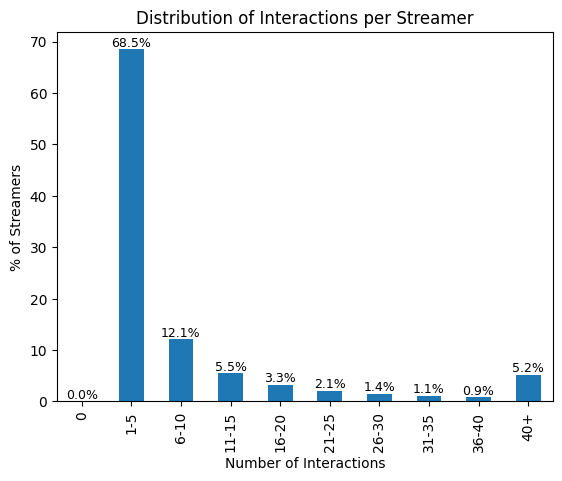

count
0         0.000000
1-5      68.453630
6-10     12.056855
11-15     5.491011
16-20     3.282480
21-25     2.131078
26-30     1.449044
31-35     1.103823
36-40     0.861283
40+       5.170796
Name: proportion, dtype: float64

In [24]:
interaction_counts = engagement['streamer_id'].value_counts()

# Step 2: Bin the counts into desired intervals
bins = [0, 0.5, 5, 10, 15, 20, 25, 30, 35, 40, float('inf')]
labels = [
    '0', '1-5', '6-10', '11-15', '16-20',
    '21-25', '26-30', '31-35', '36-40', '40+'
]
interaction_bins = pd.cut(interaction_counts, bins=bins, labels=labels, right=True, include_lowest=True)

bin_counts = interaction_bins.value_counts(normalize=True).sort_index() * 100

# Visualize
ax = bin_counts.plot(kind='bar')
plt.ylabel('% of Streamers')
plt.xlabel('Number of Interactions')
plt.title('Distribution of Interactions per Streamer')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.show(),
bin_counts

- We can see 68.4% streamers receive less than 5 interactions, while only 5.2% receive more than 40+
- We believe that is the Coldstart problem, where new streamers often get less views and interactions than older streamers
- Therefore, the tagging and recommendation activities are very important to help new streamers get starts and receive more engagements from the users

### Streamer Long-tail Popularity Distribution

In [25]:
engagement.head()

,user_id,live_id,streamer_id,timestamp,watch_live_time,p_date,interaction_type,gift_price,interaction_order,pk,session_id,user_age,user_gender,user_active_time,user_accu_watch_live_cnt,streamer_age,streamer_gender,streamer_live_operation_tag,streamer_active_time,streamer_accu_live_cnt,streamer_fans_user_num,room_live_dur,room_live_content_category,is_engagement
9,1,733942,192089,2025-05-09 20:27:14.571,0.146017,2025-05-09,click,NaN,1,1_733942_1,1_733942,24-30,F,893,50000-100000,18-23,F,Group,1908,1000-5000,1000000-2000000,252.993733,other,1
20,1,1200655,248056,2025-05-10 22:50:26.713,0.312350,2025-05-10,click,NaN,1,1_1200655_1,1_1200655,24-30,F,893,50000-100000,31-40,F,Talent,313,100-500,1000000-2000000,150.596817,other,1
21,1,1200655,248056,2025-05-10 22:50:26.713,NaN,2025-05-10,like,NaN,2,1_1200655_2,1_1200655,24-30,F,893,50000-100000,31-40,F,Talent,313,100-500,1000000-2000000,150.596817,other,1
32,1,1520913,285858,2025-05-05 00:25:02.111,0.075317,2025-05-05,click,NaN,1,1_1520913_1,1_1520913,24-30,F,893,50000-100000,24-30,F,Beauty,657,500-1000,2000000-3000000,137.597667,other,1
54,1,2820681,116940,2025-05-10 22:26:23.181,2.718033,2025-05-10,click,NaN,1,1_2820681_1,1_2820681,24-30,F,893,50000-100000,24-30,F,Group,2224,1000-5000,10000000+,135.139300,other,1


In [26]:
# 1. Bin active times
bins = [0, 30, 60, 90, 180, 365, float('inf')]
labels = ['0-30', '31-60', '61-90', '91-180', '181-365', '365+']
engagement['active_group'] = pd.cut(engagement['streamer_active_time'], bins=bins, labels=labels, right=True, include_lowest=True)

# 2. Count interactions per streamer in each active group
inter_per_streamer = (
    engagement
    .groupby(['streamer_id', 'active_group'])
    .size()
    .reset_index(name='interactions_per_streamer')
)

# 3. Calculate average interactions per streamer, per active group
avg_inter_per_group = (
    inter_per_streamer
    .groupby('active_group')['interactions_per_streamer']
    .mean()
)

avg_inter_per_group

C:\Users\a00578421\AppData\Local\Temp\ipykernel_8904\222907621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement['active_group'] = pd.cut(engagement['streamer_active_time'], bins=bins, labels=labels, right=True, include_lowest=True)
C:\Users\a00578421\AppData\Local\Temp\ipykernel_8904\222907621.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['streamer_id', 'active_group'])
C:\Users\a00578421\AppData\Local\Temp\ipykernel_8904\222907621.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a

active_group
0-30       0.572833
31-60      0.678349
61-90      0.440412
91-180     0.756203
181-365    0.829593
365+       8.530669
Name: interactions_per_streamer, dtype: float64

- Again, we can see that it is very unfair for streamer < 1 year, while Streamer 365+ days has avg. 8.5 interactions, while streamers < 30 days only have 0.57 interactions avg.
- We need to see a pipeline to build our streamers / creators development, so we can have a younger streamer generation and also attract younger user as well!

### Streaming time

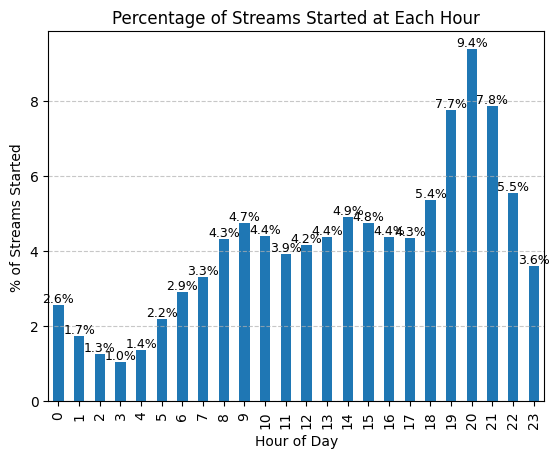

In [27]:
room['start_timestamp'] = pd.to_datetime(room['start_timestamp'])

percentages = room['start_timestamp'].dt.hour.value_counts(sort=False) / room.shape[0] * 100
percentages = percentages.reindex(range(24), fill_value=0)  # Ensure order 0–23

# Plot the bar chart
ax = percentages.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('% of Streams Started')
plt.title('Percentage of Streams Started at Each Hour')
plt.xticks(range(24), range(24))  # Label x-axis as 0–23
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)


plt.show()

- We can see that most live time start after 7pm, which is the day after work, and decreasing from 11pm to morning
- Streamers are likely to schedule the time that most users (which are rural 30+ people) often online, to get the most views and interactions
- The recommender system also need to take this patterns to the model, which better recommend appropriate content to the users and help streamer perform effectively

## 2.4 User Interactions Analysis

### User Engagement Distribution

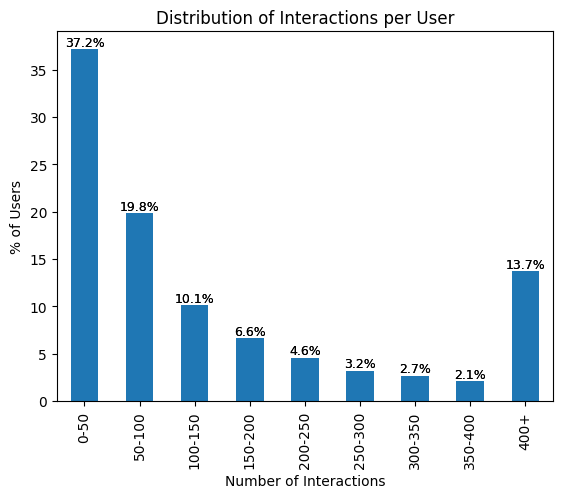

count
0-50       37.163413
50-100     19.846011
100-150    10.097610
150-200     6.609727
200-250     4.594413
250-300     3.227028
300-350     2.688489
350-400     2.078425
400+       13.694884
Name: proportion, dtype: float64

In [28]:
interaction_user_counts = engagement['user_id'].value_counts()

# Step 2: Bin the counts into desired intervals
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, float('inf')]
labels = [
    '0-50', '50-100', '100-150', '150-200', '200-250',
    '250-300', '300-350', '350-400', '400+'
]
interaction_bins = pd.cut(interaction_user_counts, bins=bins, labels=labels, right=True, include_lowest=True)

bin_counts = interaction_bins.value_counts(normalize=True).sort_index() * 100

# Visualize
ax = bin_counts.plot(kind='bar')
bin_counts.plot(kind='bar')
plt.ylabel('% of Users')
plt.xlabel('Number of Interactions')
plt.title('Distribution of Interactions per User')
# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.show()
bin_counts

- We can see that 37% of user have less than 50 engagements, while 13.7% have 400+ interactions
- It pose great challenges for recommender system, where we don't have enough informations for recommend to users with less interactions. But for heavy-usage users with diversified content, it's also difficult to recommend CTA content (like gifts) to these users

### User Activity by time

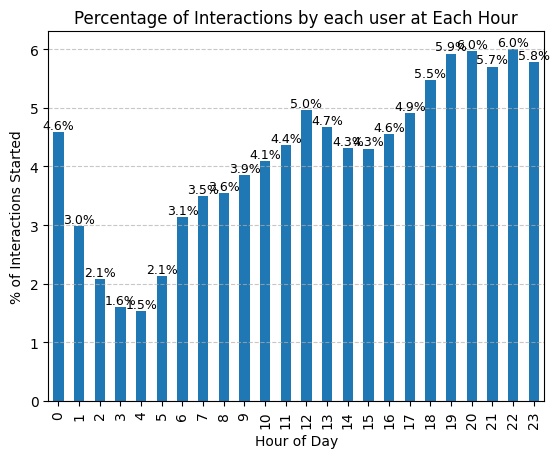

In [29]:
interactions['timestamp'] = pd.to_datetime(interactions['timestamp'])

percentages = interactions['timestamp'].dt.hour.value_counts(sort=False) / interactions.shape[0] * 100
percentages = percentages.reindex(range(24), fill_value=0)  # Ensure order 0–23

# Plot the bar chart
ax = percentages.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('% of Interactions Started')
plt.title('Percentage of Interactions by each user at Each Hour')
plt.xticks(range(24), range(24))  # Label x-axis as 0–23
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)


plt.show()

- We can see the same pattern like streamer activity, where most user interactions happen after 6pm till 12am
- We also see the peak in 12pm, maybe it is the resting time of the day for most users, having lunch, playing some games, etc.
- Based on these timing and behavior, we can recommend appropriate content, such as food during meal times, or entertaining content like games, movies after works

## 2.5 Trend Analysis

Some metrics we care to watch by daily trend:
- Sessions vs. Lives
- Engagements vs. skips
- Active Users vs. Active Streamers
- Active users vs. Avg. time spent 
- Clicks, Likes, Comments, Gifts
- Gift amount and Gifts amt per users

In [30]:
# Group by p_date for each metric
sessions_daily = interactions.groupby('p_date')['session_id'].nunique()
engagements_daily = interactions.groupby('p_date')['is_engagement'].sum()
skips_daily = interactions[interactions['is_engagement'] == 0].groupby('p_date').size()
lives_daily = room.groupby('p_date')['live_id'].nunique()
active_user_daily = interactions.groupby('p_date')['user_id'].nunique()
active_streamer_daily = interactions.groupby('p_date')['streamer_id'].nunique()
click_daily = click.groupby('p_date').size()
like_daily = like.groupby('p_date').size()
comment_daily = comment.groupby('p_date').size()
gift_daily = gift.groupby('p_date').size()
gift_amt_daily = gift.groupby('p_date')['gift_price'].sum()

daily_watch_sum = click.groupby('p_date')['watch_live_time'].sum()
daily_user_click = click.groupby('p_date')['user_id'].nunique()
avg_time_spent_daily = daily_watch_sum / daily_user_click

daily_user_gift = gift.groupby('p_date')['user_id'].nunique()
gift_amt_per_user = gift_amt_daily / daily_user_gift


In [31]:
# Combine all into a single DataFrame using pd.concat, axis=1
plot_df = pd.concat([
    sessions_daily.rename('sessions_daily'),
    engagements_daily.rename('engagements_daily'),
    skips_daily.rename('skips_daily'),
    lives_daily.rename('lives_daily'),
    active_user_daily.rename('active_user_daily'),
    active_streamer_daily.rename('active_streamer_daily'),
    click_daily.rename('click_daily'),
    like_daily.rename('like_daily'),
    comment_daily.rename('comment_daily'),
    gift_daily.rename('gift_daily'),
    gift_amt_daily.rename('gift_amt_daily'),
    avg_time_spent_daily.rename('avg_time_spent_daily'),
    gift_amt_per_user.rename('gift_amt_per_user')
], axis=1).fillna(0)

# Make sure the index (p_date) is sorted
plot_df = plot_df.sort_index()
plot_df

,sessions_daily,engagements_daily,skips_daily,lives_daily,active_user_daily,active_streamer_daily,click_daily,like_daily,comment_daily,gift_daily,gift_amt_daily,avg_time_spent_daily,gift_amt_per_user
p_date,,,,,,,,,,,,,
2025-05-04,19877,0,28650,0.0,6212,6175,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2025-05-05,627169,278133,616032,514045.0,21102,115081,255773.0,8930.0,9847.0,3583.0,356433.0,21.644596,128.815685
2025-05-06,599000,291443,566812,544257.0,20480,123545,268813.0,9136.0,9858.0,3636.0,293974.0,23.365618,108.277716
2025-05-07,608482,292965,581533,554128.0,20357,124689,270030.0,9212.0,10056.0,3667.0,291669.0,23.396045,108.306350
2025-05-08,620539,304159,583762,561663.0,20486,127670,280082.0,9626.0,10707.0,3744.0,300679.0,24.226005,108.391853
2025-05-09,620393,287777,589009,565079.0,21180,124506,265155.0,9000.0,10101.0,3521.0,350053.0,22.087360,129.505364
2025-05-10,620779,249530,634337,560883.0,21411,114932,227755.0,8656.0,9567.0,3552.0,282981.0,19.557236,102.790047
2025-05-11,649685,266960,672675,543849.0,21478,118550,243958.0,9078.0,10240.0,3684.0,316704.0,20.636978,111.712169
2025-05-12,609194,270648,605908,555903.0,20822,124412,249617.0,8291.0,9368.0,3372.0,283504.0,21.258172,113.265681


Some metrics we care to watch by daily trend:
- Sessions vs. Lives
- Engagements vs. skips
- Active Users vs. Active Streamers
- Active users vs. Avg. time spent 
- Clicks, Likes, Comments, Gifts
- Gift amount and Gifts amt per users

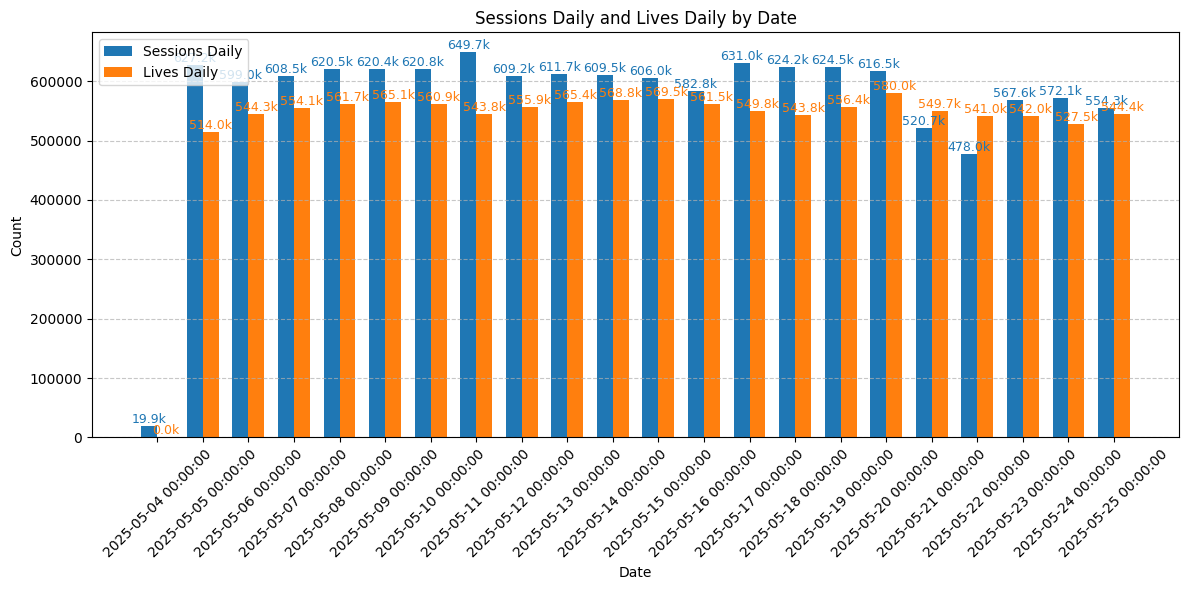

In [32]:
def create_bar_plot(df, a_col, b_col):

    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.35
    x = range(len(df.index))

    # Bar chart for columns a_col & b_col (side-by-side)
    bars1 = ax.bar([i - width/2 for i in x], df[a_col], width=width, label=a_col.replace('_', ' ').title(), color='C0')
    bars2 = ax.bar([i + width/2 for i in x], df[b_col], width=width, label=b_col.replace('_', ' ').title(), color='C1')

    ax.set_ylabel('Count')
    ax.set_xlabel('Date')
    ax.set_xticks(x)
    ax.set_xticklabels(df.index, rotation=45)
    ax.set_title(f'{a_col.replace("_"," ").title()} and {b_col.replace("_"," ").title()} by Date')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper left')

    # Data labels for bars in thousands
    for bar in bars1:
        ax.annotate(f'{bar.get_height()/1000:.1f}k',
                    (bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', fontsize=9, color='C0')
    for bar in bars2:
        ax.annotate(f'{bar.get_height()/1000:.1f}k',
                    (bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', fontsize=9, color='C1')
    plt.tight_layout()
    plt.show()

# Call the function with plot_df and the correct column names as strings
create_bar_plot(plot_df, 'sessions_daily', 'lives_daily')

- Highly consistent: 600k sessions and 540k-570k+ lives per day
- Drop and Recovey: There is a prominent dip on 2025-05-22, where sessions fall sharply to 478k (from previous days consistently above 540k), and lives also drop but less drastically. Both metrics recover quickly in subsequent days, returning to prior stable levels.
- Outliers: on 2025-05-04, I believe it is the data slide cut, so we don't care about it


C:\Users\a00578421\AppData\Local\Temp\ipykernel_8904\949609083.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n)  # Distinct colors for bars


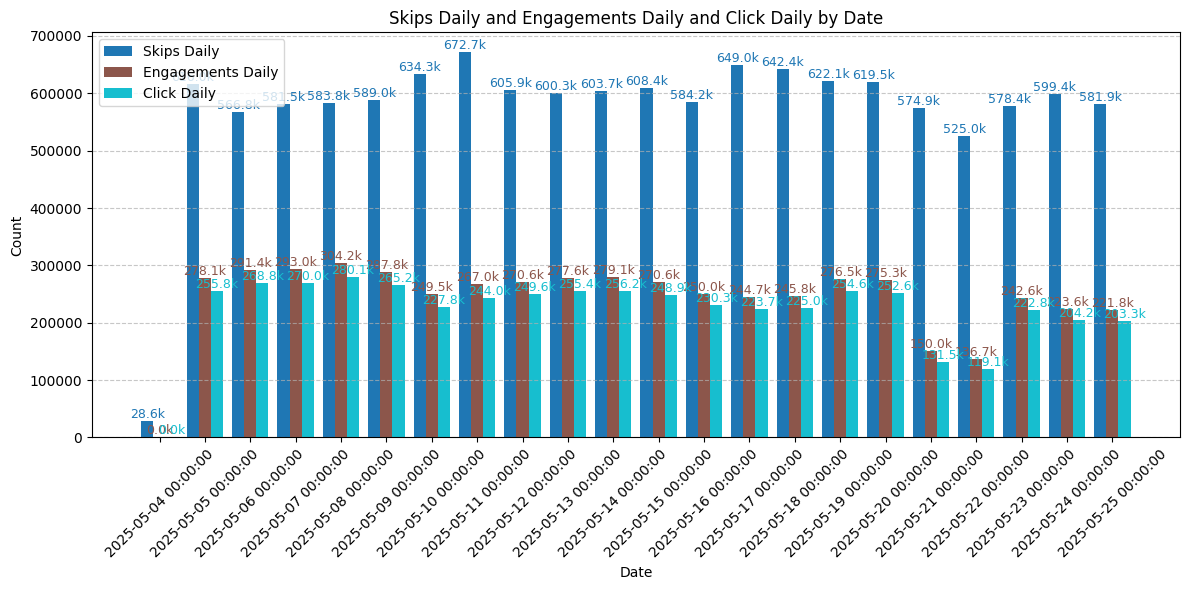

In [33]:
def create_multi_bar_plot(df, cols):
    import matplotlib.pyplot as plt
    import itertools

    fig, ax = plt.subplots(figsize=(12, 6))
    n = len(cols)
    width = 0.8 / n  # Width of each bar
    x = range(len(df.index))
    colors = plt.cm.get_cmap('tab10', n)  # Distinct colors for bars

    # Draw each bar group
    bars_list = []
    for i, col in enumerate(cols):
        offsets = [xi - 0.4 + width/2 + i * width for xi in x]
        bars = ax.bar(offsets, df[col], width=width, label=col.replace('_', ' ').title(), color=colors(i))
        bars_list.append(bars)

        # Annotate each bar (in k format)
        for bar in bars:
            ax.annotate(f'{bar.get_height()/1000:.1f}k',
                        (bar.get_x() + bar.get_width()/2, bar.get_height()),
                        ha='center', va='bottom', fontsize=9, color=colors(i))

    ax.set_ylabel('Count')
    ax.set_xlabel('Date')
    ax.set_xticks(x)
    ax.set_xticklabels(df.index, rotation=45)
    plot_names = " and ".join([c.replace("_", " ").title() for c in cols])
    ax.set_title(f'{plot_names} by Date')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

create_multi_bar_plot(plot_df, ['skips_daily', 'engagements_daily', 'click_daily'])

Here the trend is also very aligned with Sessions and Livestreams:
- The skips are very high, around 570-670k per day. This means the majority of user interactions are just sliding past lives without actually watching them.
- Total engagements trend is also the same, 230-275k daily, and a big drop in 2025-05-21 and 2025-05-22. 
- Clicks trend is the same, constribute 90% of total engagement

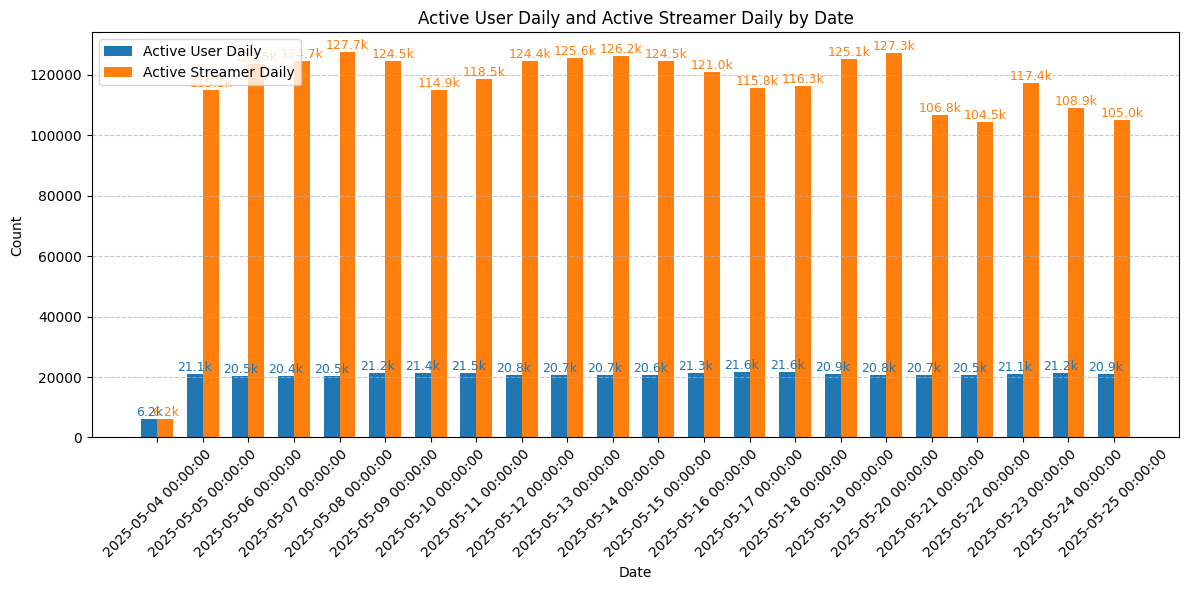

In [34]:
create_bar_plot(plot_df, 'active_user_daily', 'active_streamer_daily')

Nothing very specially as well
- Active users are very consistent, around 20-21k active users per day
- Active streamers trend also the same, with a drop in May-21st and May-22nd

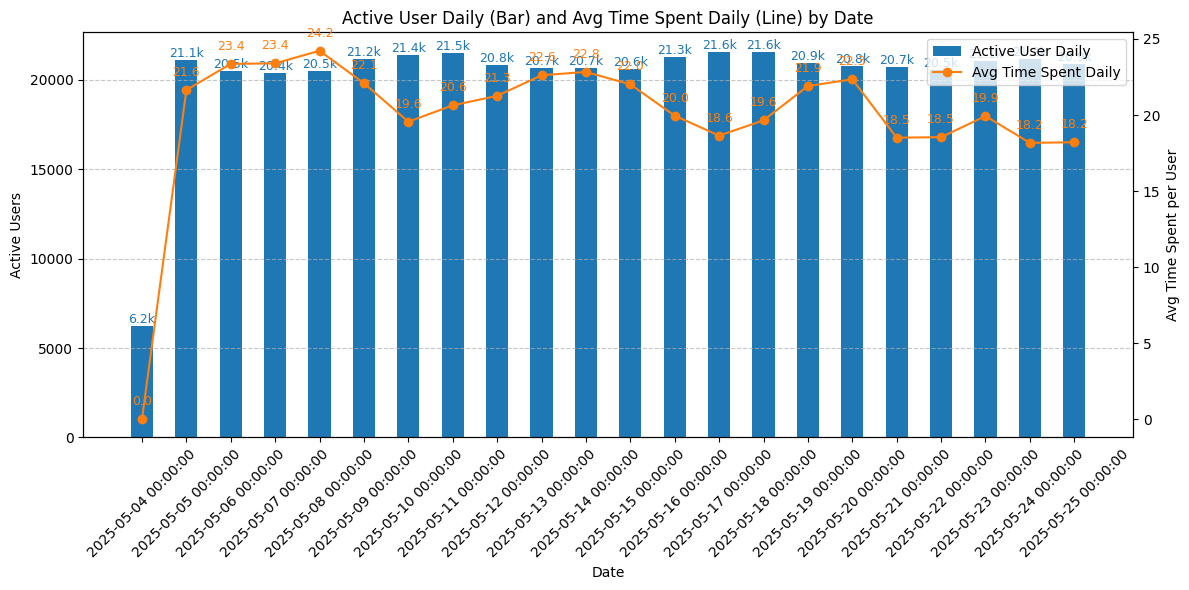

In [35]:
def create_mixed_plot(df, a_col, b_col, y1_label='Count', y2_label='Unit'):
    import matplotlib.pyplot as plt

    fig, ax1 = plt.subplots(figsize=(12, 6))
    x = range(len(df.index))
    width = 0.5

    # Bar chart for a_col (OY1)
    bars = ax1.bar(x, df[a_col], width=width, label=a_col.replace('_', ' ').title(), color='C0')
    ax1.set_ylabel(y1_label)
    ax1.set_xlabel('Date')
    ax1.set_xticks(x)
    ax1.set_xticklabels(df.index, rotation=45)
    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    ax1.legend(loc='upper left')

    # Data labels for bars (in k, one decimal)
    for bar in bars:
        ax1.annotate(f'{bar.get_height()/1000:.1f}k',
                     (bar.get_x() + bar.get_width()/2, bar.get_height()),
                     ha='center', va='bottom', fontsize=9, color='C0')

    # Line chart for b_col (OY2)
    ax2 = ax1.twinx()
    line = ax2.plot(x, df[b_col], color='C1', marker='o', label=b_col.replace('_', ' ').title())
    ax2.set_ylabel(y2_label)

    # Data labels for line (original value, one decimal, no k)
    for i, v in enumerate(df[b_col]):
        ax2.annotate(f'{v:.1f}', (i, v),
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='C1')

    # Legends on both axes
    lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    ax1.legend(lines, labels, loc='upper right')

    plt.title(f"{a_col.replace('_', ' ').title()} (Bar) and {b_col.replace('_', ' ').title()} (Line) by Date")
    plt.tight_layout()
    plt.show()


create_mixed_plot(plot_df, 'active_user_daily', 'avg_time_spent_daily', y1_label='Active Users', y2_label='Avg Time Spent per User')

The trend continue to be the same, but 1 big problem is that Avg Time Spent of user are in decreasing trend, from 23.4 min on May 5th, to 18.2 min on May 25th. While Active users are still the same!

---> That's a big alarm: The streamers are still active and produce contents, but the content may not catch the users attention!

C:\Users\a00578421\AppData\Local\Temp\ipykernel_8904\949609083.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n)  # Distinct colors for bars


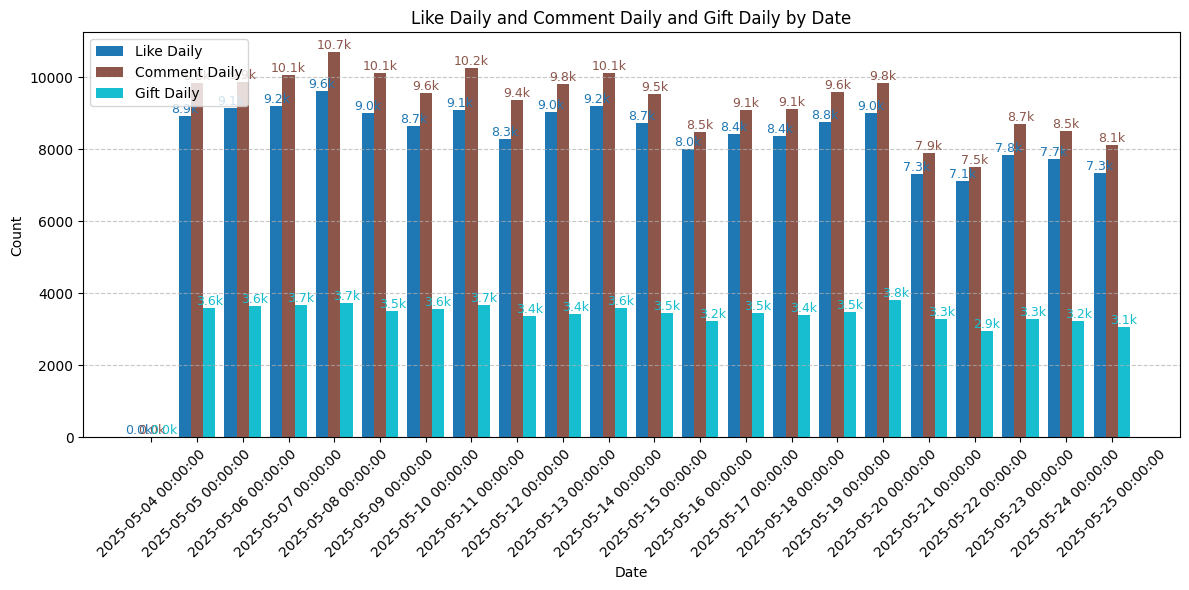

In [36]:
create_multi_bar_plot(plot_df, ['like_daily', 'comment_daily', 'gift_daily'])

Overall, we can see all engagement metrics are in decreasing trend as well (with also a big dip on May-21st and May-22nd)!

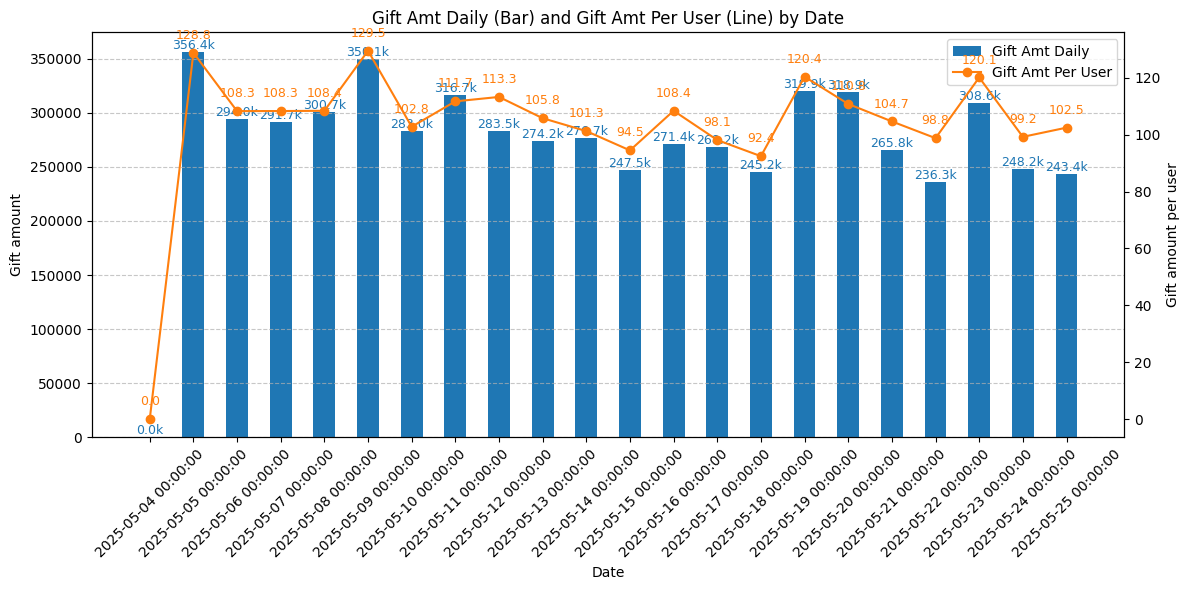

In [37]:
create_mixed_plot(plot_df, 'gift_amt_daily', 'gift_amt_per_user', y1_label='Gift amount', y2_label='Gift amount per user')

- Regarding the Gift Amount (which is 1 of Kuaishou's main revenue source), it also has a decreasing trend, averagely from 110k to 100k CNY per day!
- We also see some peak days: May 5th (Monday after the Labor holiday), May 9th (Friday, maybe Payday, weekend effect), May 18th (Sunday) and May 20th (Chinese Valentine day)

---> Next, we should investigate more and find out what categories has most Gifts, and which cat has decreasing trend so need to take care!

In general, we see that the trend is quite consistent, but in decreasing trend:
- Skips still x2 vs. Clicks, which raised a quite big concern. The numbers of streamers outweight the users, too many content for small user groups, as well as the users are aging, causing challenges for the platform to acquire new users
- Sessions, numbers of lives are consistent, with a little dip on May-21st and 22nd (after the Chinese Valentine day). We dont know, but may be it is a break after the big festival
- While streaming activities are consistent, the active users and avg. time spent are decreasing, especially time spent from 24 minutes to 18 minutes per day per user ---> Need to raise an alarm
- About the revenue streams from gifting, we also see the decreasing trend. Let's look upon CTR and Monetization!

## 2.6 Which categories has the highest CTR and Gift Amount

### Analyze Categories CTR

In [38]:
interactions['room_live_content_category'].value_counts() / interactions.shape[0] * 100

room_live_content_category
other    89.879020
shop      6.610984
game      3.509996
Name: count, dtype: float64

In [39]:
engagement[['room_live_content_category', 'streamer_live_operation_tag']].value_counts()

room_live_content_category  streamer_live_operation_tag
other                       Chat                           1630258
                            Other                           751995
                            Beauty                          609108
                            Talent                          395598
                            E-Commerce                      366870
                            Lifestyle                       359122
                            Group                           202361
shop                        E-Commerce                      182543
other                       Education                       139257
                            Relationship                    127855
                            Hobbies                          92833
shop                        Chat                             92591
game                        Game                             79754
other                       Game                             67618
shop  

In [40]:
engagement['streamer_live_operation_tag'].value_counts() / engagement.shape[0] * 100

streamer_live_operation_tag
Chat            32.306878
Other           15.210557
Beauty          11.632361
E-Commerce      10.296797
Talent           7.742182
Lifestyle        7.714932
Group            4.093107
Education        2.953556
Relationship     2.866466
Game             2.776453
Hobbies          1.903981
Fitness          0.290712
News             0.212018
Name: count, dtype: float64

I realize the room_live_content_category are not detailed enough, so I decided to use 'streamer_live_operation_tag' for detailed content categories analysis

In [41]:
sessions_cat = interactions.groupby('streamer_live_operation_tag')['session_id'].nunique()
engagements_cat = interactions.groupby('streamer_live_operation_tag')['is_engagement'].sum()
skips_cat = interactions[interactions['is_engagement'] == 0].groupby('streamer_live_operation_tag').size()
lives_cat = interactions.groupby('streamer_live_operation_tag')['live_id'].nunique()
active_user_cat = interactions.groupby('streamer_live_operation_tag')['user_id'].nunique()
active_streamer_cat = interactions.groupby('streamer_live_operation_tag')['streamer_id'].nunique()
click_cat = interactions[interactions['interaction_type'] == 'click'].groupby('streamer_live_operation_tag').size()
like_cat = interactions[interactions['interaction_type'] == 'like'].groupby('streamer_live_operation_tag').size()
comment_cat = interactions[interactions['interaction_type'] == 'comment'].groupby('streamer_live_operation_tag').size()
gift_cat = interactions[interactions['interaction_type'] == 'gift'].groupby('streamer_live_operation_tag').size()
gift_amt_cat = interactions.groupby('streamer_live_operation_tag')['gift_price'].sum()

daily_watch_sum_cat = interactions.groupby('streamer_live_operation_tag')['watch_live_time'].sum()
daily_user_click_cat = interactions[interactions['interaction_type'] == 'click'].groupby('streamer_live_operation_tag')['user_id'].nunique()
avg_time_spent_cat = daily_watch_sum_cat / daily_user_click_cat

daily_user_gift_cat = interactions[interactions['interaction_type'] == 'gift'].groupby('streamer_live_operation_tag')['user_id'].nunique()
gift_amt_per_user_cat = gift_amt_cat / daily_user_gift_cat

In [42]:
# Combine all into a single DataFrame using pd.concat, axis=1
cat_df = pd.concat([
    sessions_cat.rename('sessions_cat'),
    engagements_cat.rename('engagements_cat'),
    skips_cat.rename('skips_cat'),
    lives_cat.rename('lives_cat'),
    active_user_cat.rename('active_user_cat'),
    active_streamer_cat.rename('active_streamer_cat'),
    click_cat.rename('click_cat'),
    like_cat.rename('like_cat'),
    comment_cat.rename('comment_cat'),
    gift_cat.rename('gift_cat'),
    gift_amt_cat.rename('gift_amt_cat'),
    avg_time_spent_cat.rename('avg_time_spent_cat'),
    gift_amt_per_user_cat.rename('gift_amt_per_user_cat')
], axis=1).fillna(0)

# Make sure the index (p_date) is sorted
cat_df = cat_df.sort_index()
cat_df

,sessions_cat,engagements_cat,skips_cat,lives_cat,active_user_cat,active_streamer_cat,click_cat,like_cat,comment_cat,gift_cat,gift_amt_cat,avg_time_spent_cat,gift_amt_per_user_cat
streamer_live_operation_tag,,,,,,,,,,,,,
Beauty,1844887,620688,2169999,387176,21966,29980,564044,22572,23237,10835,1781647.0,33.458535,373.667576
Chat,3968706,1723854,4184297,1235574,23365,133591,1577206,61382,62400,22866,1991979.0,104.889561,202.375190
E-Commerce,979173,549424,768436,389596,22241,60262,513267,12229,18943,4985,54705.0,28.920956,21.899520
Education,277875,157598,204623,89137,15622,11667,144933,5070,5489,2106,22487.0,29.640940,18.208097
Fitness,38203,15512,37557,10696,8475,1505,14414,467,473,158,4536.0,5.421522,42.392523
Game,660094,148148,832627,105951,18829,9388,125355,7778,10440,4575,242591.0,19.153111,89.483954
Group,483005,218403,649162,25201,18156,1268,191328,11555,11258,4262,387495.0,48.329022,167.601644
Hobbies,407258,101594,437102,55826,20343,5609,91799,3594,4124,2077,70417.0,10.201206,54.418083
Lifestyle,795628,411659,668605,208023,21991,29894,390904,8773,9302,2680,50127.0,30.074113,29.279790


In [43]:
# Let's calculate some metrics

# Cont
cat_df['sessions_cat_cont'] = cat_df['sessions_cat'] / cat_df['sessions_cat'].sum() * 100
cat_df['engagements_cat_cont'] = cat_df['engagements_cat'] / cat_df['engagements_cat'].sum() * 100
cat_df['active_user_cat_cont'] = cat_df['active_user_cat'] / cat_df['active_user_cat'].sum() * 100
cat_df['active_streamer_cat_cont'] = cat_df['active_streamer_cat'] / cat_df['active_streamer_cat'].sum() * 100
cat_df['lives_cat_cont'] = cat_df['lives_cat'] / cat_df['lives_cat'].sum() * 100

# Conversion
cat_df['engagement_skip_ratio'] = cat_df['engagements_cat'] / cat_df['skips_cat'] * 100
cat_df['click_to_like'] = cat_df['like_cat'] / cat_df['click_cat'] * 100
cat_df['click_to_comment'] = cat_df['comment_cat'] / cat_df['click_cat'] * 100
cat_df['click_to_gift'] = cat_df['gift_cat'] / cat_df['click_cat'] * 100

# Create cat_metric_df
cat_metric_df = cat_df[['sessions_cat_cont', 'engagements_cat_cont', 'active_user_cat_cont', 'active_streamer_cat_cont', 'lives_cat_cont'
                        ,'avg_time_spent_cat', 'engagement_skip_ratio', 'click_to_like', 'click_to_comment', 'click_to_gift'
                        ,'gift_amt_cat', 'gift_amt_per_user_cat']]

cat_metric_df = cat_metric_df.sort_values(by='sessions_cat_cont', ascending=False)
cat_metric_df.style.format("{:,.1f}")

,sessions_cat_cont,engagements_cat_cont,active_user_cat_cont,active_streamer_cat_cont,lives_cat_cont,avg_time_spent_cat,engagement_skip_ratio,click_to_like,click_to_comment,click_to_gift,gift_amt_cat,gift_amt_per_user_cat
streamer_live_operation_tag,,,,,,,,,,,,
Chat,31.8,32.3,9.8,29.6,36.1,104.9,41.2,3.9,4.0,1.4,"1,991,979.0",202.4
Beauty,14.8,11.6,9.2,6.6,11.3,33.5,28.6,4.0,4.1,1.9,"1,781,647.0",373.7
Other,14.7,15.2,9.8,28.7,16.2,36.7,49.6,3.4,3.9,1.3,"593,439.0",102.9
E-Commerce,7.9,10.3,9.3,13.3,11.4,28.9,71.5,2.4,3.7,1.0,"54,705.0",21.9
Talent,6.9,7.7,9.3,6.4,7.3,23.0,54.1,3.7,3.7,1.6,"699,894.0",251.9
Lifestyle,6.4,7.7,9.2,6.6,6.1,30.1,61.6,2.2,2.4,0.7,"50,127.0",29.3
Game,5.3,2.8,7.9,2.1,3.1,19.2,17.8,6.2,8.3,3.6,"242,591.0",89.5
Group,3.9,4.1,7.6,0.3,0.7,48.3,33.6,6.0,5.9,2.2,"387,495.0",167.6
Hobbies,3.3,1.9,8.5,1.2,1.6,10.2,23.2,3.9,4.5,2.3,"70,417.0",54.4


A. Top Performers:

1. Chat: Dominance in All Key Metrics:

- Largest Sessions & Engagement

- Longest avg. time spent: 104.9 minutes (longest)

- Gift amount (total): ¥1,991,979 (biggest) & Gift per donating user: Massive, ¥202.4

- Engagement/Skip ratio: 41.2% (medium)

- Conversions from click (like/comment/gift): All strong

--> Comment:
Chat is the clear powerhouse—it leads in session share, engagement, retention, and monetization, both total and per user. This should remain a focus for growth and campaign investments, especially for live gifting.

2. Beauty

- Sessions and Engagements just after Chat

- Gifts total: ¥1,781,647 (high) & Gift per user: ¥373.7

- Click-to-gift conversion: 1.9 (highest after chat)

--> Comment:
Beauty is also highly successful both overall and per user. Engagement/skip is moderate (28.6%), but gifting efficiency is high, making this a strong monetization category.

--------
B. Promising categories:

3. Group: Gift total: ¥387,495 (very high for the share) & Gift per user: ¥167.6

4. Game:

- Per-user gift: ¥424 (superior to Beauty, lower total due to smaller user base)

- Best click-to-comment (8.3): suggests viewers are deeply involved, but very low engagement / skips (17.8%) --> We have to recommend right content for Game users, because when they love it, they are hooked on it

---> Comment: Game and Group punch above their weight in per-user monetization, making them strong candidates to target for premium gift promotions or creator investment.

------------
C. Why E-commerce has low gift amount and gift conversion rate?
- Basically E-commerce is selling products online, not gift-oriented
- As long as E-commerce has very high engagement in terms of like & comment (which perform quite well!) - which users comment to ask about the products. Its good!

----------------------
Strategic Focus:

- Monetization Focus:
Target Chat, Beauty, and Game for further monetization strategies - new gift types, premium rewards, creator campaigns, and platform investments.

- Emerging:
Talent and Group are worth nurturing; their per-user values look promising for up-sell/loyalty strategies.

### Looking at some core categories 

#### Chat

In [44]:
chat = engagement[engagement['streamer_live_operation_tag'] == 'Chat']
chat_interactions = interactions[interactions['streamer_live_operation_tag'] == 'Chat']


def cat_calculate_metrics(df, df_interactions):
    sessions_cat = df.groupby(['p_date'])['session_id'].nunique()
    engagements_cat = df.groupby(['p_date'])['is_engagement'].sum()
    skips_cat = df_interactions[df_interactions['is_engagement'] == 0].groupby(['p_date']).size()
    lives_cat = df.groupby(['p_date'])['live_id'].nunique()
    active_user_cat = df.groupby(['p_date'])['user_id'].nunique()
    active_streamer_cat = df.groupby(['p_date'])['streamer_id'].nunique()
    click_cat = df[df['interaction_type'] == 'click'].groupby(['p_date']).size()
    like_cat = df[df['interaction_type'] == 'like'].groupby(['p_date']).size()
    comment_cat = df[df['interaction_type'] == 'comment'].groupby(['p_date']).size()
    gift_cat = df[df['interaction_type'] == 'gift'].groupby(['p_date']).size()
    gift_amt_cat = df.groupby(['p_date'])['gift_price'].sum()

    daily_watch_sum_cat = df.groupby(['p_date'])['watch_live_time'].sum()
    daily_user_click_cat = df[df['interaction_type'] == 'click'].groupby(['p_date'])['user_id'].nunique()
    avg_time_spent_cat = daily_watch_sum_cat / daily_user_click_cat

    daily_user_gift_cat = df[df['interaction_type'] == 'gift'].groupby(['p_date'])['user_id'].nunique()
    gift_amt_per_user_cat = gift_amt_cat / daily_user_gift_cat

    # Combine all into a single DataFrame using pd.concat, axis=1
    cat_df = pd.concat([
        sessions_cat.rename('sessions_cat'),
        engagements_cat.rename('engagements_cat'),
        skips_cat.rename('skips_cat'),
        lives_cat.rename('lives_cat'),
        active_user_cat.rename('active_user_cat'),
        active_streamer_cat.rename('active_streamer_cat'),
        click_cat.rename('click_cat'),
        like_cat.rename('like_cat'),
        comment_cat.rename('comment_cat'),
        gift_cat.rename('gift_cat'),
        gift_amt_cat.rename('gift_amt_cat'),
        avg_time_spent_cat.rename('avg_time_spent_cat'),
        gift_amt_per_user_cat.rename('gift_amt_per_user_cat')
    ], axis=1).fillna(0)

    # Make sure the index (p_date) is sorted
    cat_df = cat_df.sort_index()
    cat_df

    # Let's calculate some metrics

    # Cont
    cat_df['sessions_cat_cont'] = cat_df['sessions_cat'] / cat_df['sessions_cat'].sum() * 100
    cat_df['engagements_cat_cont'] = cat_df['engagements_cat'] / cat_df['engagements_cat'].sum() * 100
    cat_df['active_user_cat_cont'] = cat_df['active_user_cat'] / cat_df['active_user_cat'].sum() * 100
    cat_df['active_streamer_cat_cont'] = cat_df['active_streamer_cat'] / cat_df['active_streamer_cat'].sum() * 100
    cat_df['lives_cat_cont'] = cat_df['lives_cat'] / cat_df['lives_cat'].sum() * 100

    # Conversion
    cat_df['engagement_skip_ratio'] = cat_df['engagements_cat'] / cat_df['skips_cat'] * 100
    cat_df['click_to_like'] = cat_df['like_cat'] / cat_df['click_cat'] * 100
    cat_df['click_to_comment'] = cat_df['comment_cat'] / cat_df['click_cat'] * 100
    cat_df['click_to_gift'] = cat_df['gift_cat'] / cat_df['click_cat'] * 100

    # Create cat_metric_df
    cat_metric_df = cat_df[['sessions_cat_cont', 'engagements_cat_cont', 'active_user_cat_cont', 'active_streamer_cat_cont', 'lives_cat_cont'
                            ,'avg_time_spent_cat', 'engagement_skip_ratio', 'click_to_like', 'click_to_comment', 'click_to_gift'
                            ,'gift_amt_cat', 'gift_amt_per_user_cat']]

    cat_metric_df.dropna(axis=0, inplace=True)
    cat_metric_df = cat_metric_df.sort_values(by='p_date', ascending=False)


    return cat_metric_df.style.format("{:,.1f}")

cat_calculate_metrics(chat, chat_interactions)

C:\Users\a00578421\AppData\Local\Temp\ipykernel_8904\248310485.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_metric_df.dropna(axis=0, inplace=True)


,sessions_cat_cont,engagements_cat_cont,active_user_cat_cont,active_streamer_cat_cont,lives_cat_cont,avg_time_spent_cat,engagement_skip_ratio,click_to_like,click_to_comment,click_to_gift,gift_amt_cat,gift_amt_per_user_cat
p_date,,,,,,,,,,,,
2025-05-25 00:00:00,4.4,4.3,4.6,4.4,4.4,9.8,39.4,3.7,3.7,1.4,"117,238.0",149.7
2025-05-24 00:00:00,4.6,4.5,4.7,4.7,4.7,9.5,38.6,3.7,3.8,1.4,"119,336.0",140.2
2025-05-23 00:00:00,5.2,5.2,4.9,5.5,5.4,11.5,41.6,3.6,3.8,1.4,"93,413.0",94.5
2025-05-22 00:00:00,2.9,3.0,4.5,3.7,3.4,11.1,27.0,6.3,6.2,2.4,"99,897.0",105.4
2025-05-21 00:00:00,3.3,3.4,4.6,3.8,3.5,10.7,27.5,5.7,5.8,2.4,"85,181.0",83.8
2025-05-20 00:00:00,5.6,5.6,4.9,5.6,5.7,12.1,44.1,3.9,3.8,1.5,"107,408.0",98.3
2025-05-19 00:00:00,5.4,5.4,4.9,5.3,5.3,11.3,42.2,3.6,3.8,1.3,"105,456.0",109.1
2025-05-18 00:00:00,4.6,4.5,4.9,4.6,4.6,10.4,38.4,3.9,4.0,1.4,"65,755.0",74.8
2025-05-17 00:00:00,4.5,4.5,4.9,4.6,4.6,9.7,38.6,3.9,3.9,1.4,"79,160.0",88.2


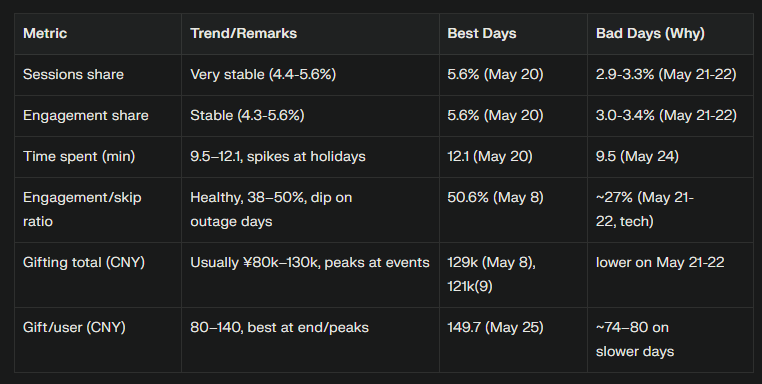

Chat is your anchor category, reliably driving platform gifts and engagement. Its strong performance during normal days and on gifting holidays—and rapid post-outage recovery—marks it as a strategic area for continued investment in features, seasonal campaigns, and streamer support.

#### Game

In [ ]:
beauty = engagement[engagement['streamer_live_operation_tag'] == 'Beauty']
beauty_interactions = interactions[interactions['streamer_live_operation_tag'] == 'Beauty']

talent = engagement[engagement['streamer_live_operation_tag'] == 'Talent']
talent_interactions = interactions[interactions['streamer_live_operation_tag'] == 'Talent']

game = engagement[engagement['streamer_live_operation_tag'] == 'Game']
game_interactions = interactions[interactions['streamer_live_operation_tag'] == 'Game']

cat_calculate_metrics(game, game_interactions)


C:\Users\a00578421\AppData\Local\Temp\ipykernel_8904\248310485.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_metric_df.dropna(axis=0, inplace=True)


,sessions_cat_cont,engagements_cat_cont,active_user_cat_cont,active_streamer_cat_cont,lives_cat_cont,avg_time_spent_cat,engagement_skip_ratio,click_to_like,click_to_comment,click_to_gift,gift_amt_cat,gift_amt_per_user_cat
p_date,,,,,,,,,,,,
2025-05-25 00:00:00,6.0,6.0,5.6,5.3,5.3,5.0,16.7,6.9,9.0,3.8,"32,145.0",125.6
2025-05-24 00:00:00,5.7,5.6,5.3,5.6,5.8,5.2,16.3,7.1,9.0,3.8,"8,219.0",34.5
2025-05-23 00:00:00,5.3,5.3,5.3,5.4,5.3,4.4,17.6,6.1,8.4,3.7,"7,833.0",35.1
2025-05-22 00:00:00,3.3,3.5,3.9,3.7,3.6,5.7,13.1,8.5,8.8,4.7,"11,036.0",59.7
2025-05-21 00:00:00,3.8,4.0,4.1,4.0,4.0,6.3,13.1,7.7,9.9,4.9,"4,962.0",23.6
2025-05-20 00:00:00,5.3,5.3,5.1,5.3,5.2,4.6,19.4,5.2,8.9,3.9,"6,329.0",27.2
2025-05-19 00:00:00,5.0,4.9,4.8,5.1,5.1,4.2,20.0,5.3,7.2,2.9,"8,587.0",50.2
2025-05-18 00:00:00,5.8,5.9,5.7,5.2,5.4,4.8,16.6,6.3,8.7,3.8,"3,504.0",13.2
2025-05-17 00:00:00,5.3,5.3,5.2,5.2,5.4,4.1,16.3,6.7,8.8,4.2,"55,713.0",215.1


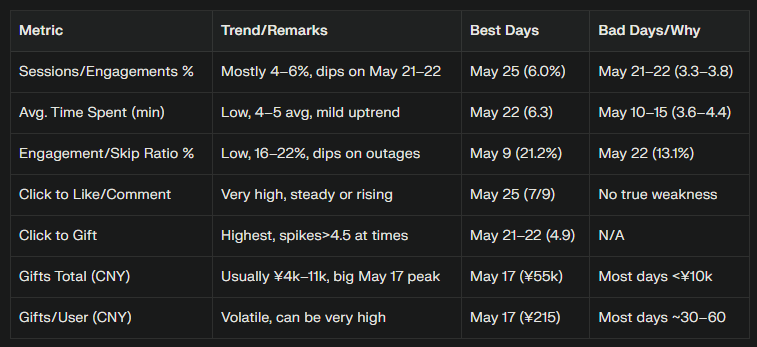

Conclusion:

- Game is a strong engagement and gift conversion category with big-event potential.

- Audiences are smaller and spend less time per session, but are deeply interactive, especially if incentivized.

- Major spikes show potential for event-driven monetization.

- Target this category for in-app game events, competitive leaderboards, or streamer tournaments to maximize conversion and gifts.

#### Beauty

In [46]:
cat_calculate_metrics(beauty, beauty_interactions)

C:\Users\a00578421\AppData\Local\Temp\ipykernel_8904\248310485.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_metric_df.dropna(axis=0, inplace=True)


,sessions_cat_cont,engagements_cat_cont,active_user_cat_cont,active_streamer_cat_cont,lives_cat_cont,avg_time_spent_cat,engagement_skip_ratio,click_to_like,click_to_comment,click_to_gift,gift_amt_cat,gift_amt_per_user_cat
p_date,,,,,,,,,,,,
2025-05-25 00:00:00,4.5,4.5,4.7,4.6,4.6,4.8,26.2,3.6,4.1,1.9,"41,433.0",102.1
2025-05-24 00:00:00,5.0,4.9,5.0,4.9,5.0,4.8,26.2,3.9,4.1,2.0,"56,155.0",118.5
2025-05-23 00:00:00,5.4,5.3,4.9,5.6,5.6,4.8,29.9,4.0,4.1,1.9,"149,957.0",306.7
2025-05-22 00:00:00,3.0,3.1,4.1,3.9,3.6,5.4,20.0,5.9,6.1,2.8,"60,610.0",150.0
2025-05-21 00:00:00,3.5,3.6,4.2,4.0,3.8,5.7,21.6,5.5,5.9,3.0,"89,013.0",191.8
2025-05-20 00:00:00,5.4,5.4,4.9,5.5,5.6,5.4,30.6,3.7,3.9,2.0,"137,745.0",287.6
2025-05-19 00:00:00,5.4,5.4,4.9,5.4,5.5,5.3,31.4,3.8,3.9,1.8,"134,871.0",324.2
2025-05-18 00:00:00,4.7,4.8,5.0,4.6,4.7,4.6,25.9,4.4,4.4,2.0,"74,000.0",165.9
2025-05-17 00:00:00,4.8,4.7,5.0,4.6,4.6,4.8,26.0,4.3,4.3,2.1,"55,196.0",118.2


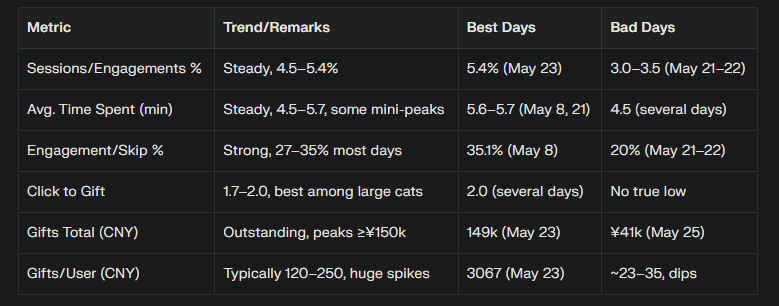

Conclusion:

- Beauty is your the monetization and conversion category, excelling in turning viewers into paying gifters.

- Strategic campaigns, VIP experiences, or collaborations can push spikes even higher.

- Performance is robust, stable, and recovers fast after system events—an essential pillar of platform gifting and engagement.

#### Talent

In [47]:
cat_calculate_metrics(talent, talent_interactions)

C:\Users\a00578421\AppData\Local\Temp\ipykernel_8904\248310485.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_metric_df.dropna(axis=0, inplace=True)


,sessions_cat_cont,engagements_cat_cont,active_user_cat_cont,active_streamer_cat_cont,lives_cat_cont,avg_time_spent_cat,engagement_skip_ratio,click_to_like,click_to_comment,click_to_gift,gift_amt_cat,gift_amt_per_user_cat
p_date,,,,,,,,,,,,
2025-05-25 00:00:00,4.5,4.5,4.4,4.5,4.5,3.6,53.1,3.4,3.5,1.5,"9,033.0",40.5
2025-05-24 00:00:00,4.4,4.3,4.5,4.5,4.5,3.7,50.3,3.6,3.6,1.6,"19,014.0",84.9
2025-05-23 00:00:00,5.1,5.1,4.7,5.4,5.3,4.5,57.5,3.7,3.7,1.7,"33,948.0",125.7
2025-05-22 00:00:00,2.8,2.9,3.8,3.5,3.3,4.6,35.0,5.6,5.7,2.5,"25,379.0",110.3
2025-05-21 00:00:00,2.7,2.9,3.7,3.3,3.1,4.7,30.1,5.7,5.9,2.8,"29,978.0",120.9
2025-05-20 00:00:00,5.6,5.6,5.1,5.5,5.5,4.3,56.4,3.4,3.5,1.6,"38,140.0",138.2
2025-05-19 00:00:00,5.6,5.5,5.1,5.4,5.4,4.2,59.4,3.7,3.2,1.5,"27,838.0",106.3
2025-05-18 00:00:00,4.6,4.6,4.9,4.7,4.7,3.8,50.2,3.7,3.6,1.7,"28,813.0",121.1
2025-05-17 00:00:00,4.3,4.2,4.7,4.4,4.5,3.9,48.2,4.1,3.7,1.8,"29,056.0",120.1


### Propose CTR for each Categories

What's Improving:

- Chat: Consistent market leadership with stable 40%+ engagement/skip ratios and premium gift monetization (¥150+ per user)

- Beauty: Strong conversion efficiency with 1.8% click-to-gift rates and seasonal performance peaks

- Talent: Exceptional engagement depth (60% engagement/skip ratio) with loyal, high-value audience segments

What's Declining/Concerning:

- Game: Below-average engagement/skip ratios (18%) despite high conversion potential

- Platform-wide: Vulnerability to technical disruptions (May 21-22 showed universal dips across categories)

- General: Session durations remain shorter than industry benchmarks across all categories

Chat Category KPIs
Average Time Spent: 10.8 → 12.0 minutes (target) / 14.0 minutes (stretch)

Engagement/Skip Ratio: 43% → 48% (target) / 55% (stretch)

Click-to-Gift: 1.4% → 1.6% (target) / 2.0% (stretch)

Gift per User: ¥150 → ¥180 (target) / ¥220 (stretch)

Strategy: Premium features, VIP programs, exclusive events. Chat is your anchor category—invest heavily in retention and premium monetization

Beauty Category KPIs
Average Time Spent: 5.0 → 5.5 minutes (target) / 6.5 minutes (stretch)

Engagement/Skip Ratio: 30% → 35% (target) / 42% (stretch)

Click-to-Gift: 1.8% → 2.0% (target) / 2.4% (stretch)

Gift per User: ¥180 → ¥220 (target) / ¥280 (stretch)

Strategy: Brand partnerships, tutorial content, seasonal campaigns. Beauty shows highest per-user monetization potential.

Talent Category KPIs
Average Time Spent: 4.1 → 4.8 minutes (target) / 5.5 minutes (stretch)

Engagement/Skip Ratio: 60% → 65% (target) / 70% (stretch)

Click-to-Gift: 1.6% → 1.8% (target) / 2.2% (stretch)

Gift per User: ¥140 → ¥170 (target) / ¥210 (stretch)

Strategy: Talent competitions, recognition programs, premium content. Maintain exceptional engagement depth.

Game Category KPIs
Average Time Spent: 4.4 → 5.0 minutes (target) / 6.0 minutes (stretch)

Engagement/Skip Ratio: 18% → 22% (target) / 28% (stretch)

Click-to-Gift: 3.2% → 3.5% (target) / 4.0% (stretch)

Gift per User: ¥110 → ¥140 (target) / ¥180 (stretch)

Strategy: Gaming tournaments, in-game rewards, community events. Highest growth potential with 15-30% upside.

Strategic Implementation
Phase 1 (Months 1-3): Foundation building with enhanced analytics and creator incentives
Phase 2 (Months 4-6): Category-specific optimization and premium features
Phase 3 (Months 7-12): Full-scale campaigns and AI-driven personalization

Monitoring: Daily technical metrics, weekly conversion tracking, monthly performance reviews, quarterly competitive analysis.

This framework balances aggressive growth targets with realistic industry benchmarks, focusing on each category's unique strengths while addressing systematic improvement opportunities across the platform.

# 3. User Funnel Analysis

For the User Funnel, I will do with 2 approach:
- Assume the User Journey from Session Start -> Click -> Comment -> Like -> Gift
- Build the Sankey diagram to visualize different paths of Kuaishou user behaviors

## 3.1 Assume User Journey: Sessions Start -> Click -> Comment -> Like -> Gift

- OK, we have total 18M interactions, with 12.6M are Skips (negative) and 4.8M are clicks.
- Now I will prepare some code to build the conversion flow. I will only care about the journey from Session Started to Click (disregard the skips - negative)

In [49]:
def define_funnel_flags(df):
    session_level = df.sort_values(['session_id','interaction_order']).groupby('session_id').agg({
        'interaction_type': lambda x: list(x)
    })
    session_level['engaged'] = session_level['interaction_type'].apply(lambda x: any(i != 'negative' for i in x))
    session_level['commented'] = session_level['interaction_type'].apply(lambda x: 'comment' in x)
    session_level['liked'] = session_level['interaction_type'].apply(lambda x: 'like' in x)
    session_level['gifted'] = session_level['interaction_type'].apply(lambda x: 'gift' in x)
    session_level['clicked'] = session_level['interaction_type'].apply(lambda x: 'click' in x)
    session_level = session_level.reset_index()
    return session_level

session_summary = define_funnel_flags(interactions)
session_summary.head()

,session_id,interaction_type,engaged,commented,liked,gifted,clicked
0,10000_10037309,[click],True,False,False,False,True
1,10000_10071490,[negative],False,False,False,False,False
2,10000_10084187,[negative],False,False,False,False,False
3,10000_10095032,[negative],False,False,False,False,False
4,10000_10109334,[negative],False,False,False,False,False


In [50]:
def funnel_metrics(session_summary):
    stages = [
        ("Session Start", lambda df: len(df)),
        ("Clicked", lambda df: df['clicked'].sum()),
        ("Commented", lambda df: df['commented'].sum()),
        ("Liked", lambda df: df['liked'].sum()),
        ("Gifted", lambda df: df['gifted'].sum())
    ]
    values = []
    for label, func in stages:
        values.append((label, func(session_summary)))

    funnel_df = pd.DataFrame(values, columns=['stage', 'sessions'])
    funnel_df['conversion_rate'] = funnel_df['sessions'].div(funnel_df['sessions'].shift().replace(0,np.nan)) * 100
    funnel_df['conversion_rate'] = funnel_df['conversion_rate'].fillna(100).round(2)
    return funnel_df

funnel_df = funnel_metrics(session_summary)
funnel_df

,stage,sessions,conversion_rate
0,Session Start,12473348,100.00
1,Clicked,4279050,34.31
2,Commented,185939,4.35
3,Liked,170650,91.78
4,Gifted,70698,41.43


In [51]:
import plotly.graph_objects as go

def plot_funnel_chart(metrics_df):
    fig = go.Figure(go.Funnel(
        y=metrics_df['stage'],
        x=metrics_df['sessions'],
        textinfo='value+percent initial'))
    fig.update_layout(title='Livestream User Engagement Funnel')
    fig.show()

# 5. Plot funnel (optional)
plot_funnel_chart(funnel_df)

OK, now we have a quick visual for our assummed flow.
- 1 interesting fact is that we even have more Comments than Likes - which reflect a different user behavior vs. other platform (Comment first then like)
- We can see that Kuaishou engagement (Session-To-Click) is quite excellent (34%) vs. industry standard (20-30%). Click-to-Gift conversion  1.65% (70.6k Gifts / 4.27M Clicks) is around industry average (1-2%) for live shopping
- Areas to improve: While we have good Session-To-Click, Comments and Like is very small (around 4%).
- Let's look at the benchmark tables below


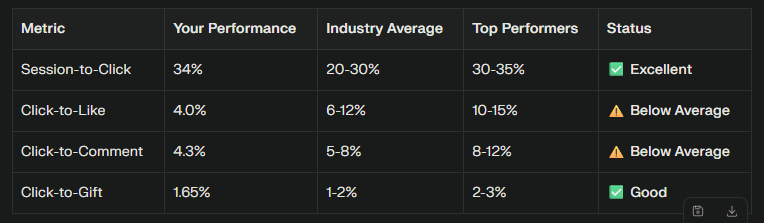

Recommendations:
- Boost Like/Comment Engagement: Train hosts to actively request likes and comments, use polls, Q&A sessions
- Gamification: Implement comment-to-win contests and interactive features
- Content Quality: Focus on more engaging, interactive content to increase depth metri

## 3.2 Sankey Funnel

When investigating the data, I realize that the flow is not straightforward like. So I decided to create a Sankey to see how the flow go?

In [52]:
# I prep a df for Sankey model
interactions_df2 = pd.read_csv('cleaned_dataset/interactions_df2.csv')
interactions_df2.head()

,user_id,live_id,streamer_id,timestamp,watch_live_time,p_date,interaction_type,gift_price,interaction_order,pk,session_id,step_1,step_2,step_3,step_4,step_5
0,1,24005,307482,2025-05-10 04:46:21.212,NaN,20250510,negative,NaN,1,1_24005_1.0,1_24005,negative,negative,NaN,NaN,NaN
1,1,24005,307482,2025-05-10 05:42:39.811,NaN,20250510,negative,NaN,2,1_24005_2.0,1_24005,negative,negative,NaN,NaN,NaN
2,1,252326,169041,2025-05-09 15:05:42.101,NaN,20250509,negative,NaN,1,1_252326_1.0,1_252326,negative,NaN,NaN,NaN,NaN
3,1,264714,193781,2025-05-10 16:37:06.659,NaN,20250510,negative,NaN,1,1_264714_1.0,1_264714,negative,NaN,NaN,NaN,NaN
4,1,266768,430309,2025-05-05 04:25:33.964,NaN,20250505,negative,NaN,1,1_266768_1.0,1_266768,negative,NaN,NaN,NaN,NaN


In [ ]:
flow_test = interactions_df2[interactions_df2['interaction_order'] == 1]
flow_test = flow_test[['session_id', 'step_1', 'step_2', 'step_3', 'step_4', 'step_5']].drop_duplicates()

# We only care about real engagement, not skip in the beginning!
flow_click = flow_test[flow_test['step_1'] == 'click'].copy()
flow_click

,session_id,step_1,step_2,step_3,step_4,step_5
9,1_733942,click,NaN,NaN,NaN,NaN
20,1_1200655,click,like,NaN,NaN,NaN
32,1_1520913,click,NaN,NaN,NaN,NaN
54,1_2820681,click,comment,gift,like,click
81,1_4006428,click,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
18003767,23772_11389627,click,NaN,NaN,NaN,NaN
18003768,23772_11409808,click,NaN,NaN,NaN,NaN
18003777,23772_11530381,click,NaN,NaN,NaN,NaN
18003778,23772_11575710,click,NaN,NaN,NaN,NaN


In [56]:
# Calculate total click sessions
total_click_sessions = flow_click['session_id'].nunique()

# Build step columns and all actions
step_cols = [col for col in flow_click.columns if col.startswith('step_')]
actions = set()
for col in step_cols:
    actions.update(flow_click[col].dropna().unique())
actions = list(actions)

# Build nodes (step x action) and indices
node_names, node_index = [], {}
counter = 0
for i, col in enumerate(step_cols):
    for a in actions:
        node = f'Step {i+1}: {a}'
        node_names.append(node)
        node_index[node] = counter
        counter += 1

# Links between consecutive steps (for only these sessions)
sources, targets, values, labels, customdata = [], [], [], [], []

# Layer 1 counts (always from filtered set)
for a in actions:
    tgt_node = f"Step 1: {a}"
    count = (flow_click['step_1'] == a).sum()
    if count > 0:
        sources.append(None)  # No source for first layer!
        targets.append(node_index[tgt_node])
        values.append(count)
        conv_rate = count / total_click_sessions * 100
        customdata.append(f"{count} sessions ({conv_rate:.2f}% of click sessions)")
        labels.append(a)

# Between steps
for i in range(len(step_cols) - 1):
    c_col = step_cols[i]
    n_col = step_cols[i+1]
    for a1 in actions:
        for a2 in actions:
            mask = (flow_click[c_col] == a1) & (flow_click[n_col] == a2)
            count = mask.sum()
            if count > 0:
                src_node = f"Step {i+1}: {a1}"
                tgt_node = f"Step {i+2}: {a2}"
                sources.append(node_index[src_node])
                targets.append(node_index[tgt_node])
                values.append(count)
                conv_rate = count / total_click_sessions * 100
                customdata.append(f"{count} ({conv_rate:.2f}% of initial click)")
                labels.append(f"{a1}→{a2}")

In [57]:
# Add a root node for cohort
node_names = ['Click sessions cohort'] + node_names
node_index = {name: i for i, name in enumerate(node_names)}

new_sources, new_targets, new_values, new_customdata = [], [], [], []
for i, v in enumerate(values):
    src = sources[i]
    tgt = targets[i]
    if src is None:
        new_sources.append(0)  # Root index
        new_targets.append(tgt + 1)
    else:
        new_sources.append(src + 1)
        new_targets.append(tgt + 1)
    new_values.append(v)
    new_customdata.append(customdata[i])

# Remove empty source links (since everything starts from root now)
sources, targets, values, customdata = new_sources, new_targets, new_values, new_customdata

In [58]:
import plotly.graph_objects as go

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_names
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        customdata=customdata,
        hovertemplate='Path: %{source.label} → %{target.label}<br>Count: %{value}<br>%{customdata}<extra></extra>'
    )
))
fig.update_layout(
    title_text="User Journey (Starting from Click) - With Conversion Rates", 
    font_size=12, width=1100, height=650, 
    margin=dict(l=60, r=60, t=80, b=20)
)
fig.show()


Primary User Behaviors:

- Multiple clicks dominate: The largest flow is users making additional clicks (Step 2-5 clicks), showing users are actively browsing/exploring multiple livestreams

- Engagement paths are thin: Comment, like, and gift flows are noticeably smaller compared to continued clicking behavior

- Multi-step engagement exists: Users who engage once (comment/like/gift) tend to continue with more actions, as shown by the Step 3-5 flows

Key Insights:

1. Browse-Heavy Behavior

- Users predominantly browse through multiple streams rather than deeply engaging with single content

This suggests either:

- Content discovery mode (users searching for preferred content)

- Short attention spans per stream

- Algorithm showing diverse content that doesn't immediately hook viewers

2. Low Initial Engagement Conversion

- Very thin flows from Step 1 to comments/likes/gifts indicate weak initial engagement

- Most users who click don't immediately engage - they continue browsing instead

3. Positive: Sequential Engagement

- Users who do engage (comment/like/gift) often continue engaging further (Steps 3-5)

- This shows that once hooked, users become highly engaged

- Gift users appear to be particularly loyal, continuing to multiple steps

Strategic Implications

1. Opportunities:
- Reduce Browse-and-Leave: Implement features to capture attention faster in first few seconds of click

- Improve Content Matching: Better algorithmic recommendations to reduce excessive browsing

- Engagement Triggers: Add interactive elements (polls, Q&A) to convert browsers to engagers sooner

2. Strengths to Leverage:

- Strong Sequential Engagement: Once users engage, they stay engaged - optimize for this conversion moment

- Gift User Loyalty: Gift users show strong continued engagement - create VIP experiences for them

Now, I am thinking about: What actions will lead users to the Gifting? So we can do better steps before the monetization stage!

In [59]:
# Filter to sessions that start with click
click_df = flow_test[flow_test['step_1'] == 'click'].copy()

# What step columns do we have?
step_cols = [c for c in click_df.columns if c.startswith('step_')]
actions = set()
for c in step_cols:
    actions.update(click_df[c].dropna().unique())
actions = sorted(actions)

summary = []
n_steps = len(step_cols)
base = len(click_df)

# For step1, get counts as base for conversion (all are 'click' by filter)
prev_mask = (click_df['step_1'] == 'click')
prev_total = prev_mask.sum()

for k in range(n_steps - 1):
    from_col = step_cols[k]
    to_col = step_cols[k+1]
    # For every action in this step (in practice will mostly be 'click' for step1)
    for act in actions:
        mask = (click_df[from_col] == act)
        n_from = mask.sum()
        if n_from == 0: continue
        # Next state counts, fill NaN as 'exit'
        next_counts = click_df.loc[mask, to_col].fillna('exit').value_counts()
        for nxt in actions + ['exit']:
            cnt = next_counts.get(nxt, 0)
            rate = cnt / n_from * 100
            summary.append({
                'from_step': k + 1,
                'from_action': act,
                'to_action': nxt,
                'count': cnt,
                'conversion_rate_%': round(rate,2),
                'base_n': n_from
            })
    # For next loop
    # You could also recalc mask if extending to arbitrary branching

summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values(['from_step','from_action','to_action']).reset_index(drop=True)
summary_df


,from_step,from_action,to_action,count,conversion_rate_%,base_n
0,1,click,click,400890,9.37,4277106
1,1,click,comment,161237,3.77,4277106
2,1,click,exit,3599642,84.16,4277106
3,1,click,gift,25760,0.60,4277106
4,1,click,like,89577,2.09,4277106
...,...,...,...,...,...,...
60,4,like,click,5192,20.26,25633
61,4,like,comment,208,0.81,25633
62,4,like,exit,20208,78.84,25633
63,4,like,gift,19,0.07,25633


In [60]:
summary_df[summary_df['from_action'] == 'click']

,from_step,from_action,to_action,count,conversion_rate_%,base_n
0,1,click,click,400890,9.37,4277106
1,1,click,comment,161237,3.77,4277106
2,1,click,exit,3599642,84.16,4277106
3,1,click,gift,25760,0.60,4277106
4,1,click,like,89577,2.09,4277106
5,2,click,click,86993,21.70,400890
6,2,click,comment,10035,2.50,400890
7,2,click,exit,296340,73.92,400890
8,2,click,gift,1732,0.43,400890
9,2,click,like,5790,1.44,400890


In [61]:
# What is the higest conversion rate to gift?
summary_df[summary_df['to_action'] == 'gift'].sort_values(by='conversion_rate_%', ascending=False)

,from_step,from_action,to_action,count,conversion_rate_%,base_n
13,2,comment,gift,34239,21.24,161237
53,4,comment,gift,1038,16.22,6399
33,3,comment,gift,1688,15.61,10816
48,4,click,gift,528,1.12,47349
28,3,click,gift,930,0.77,120029
3,1,click,gift,25760,0.60,4277106
8,2,click,gift,1732,0.43,400890
58,4,gift,gift,6,0.22,2671
18,2,gift,gift,28,0.11,25760
23,2,like,gift,92,0.10,89577


This table above show that:
- Comment → Gift: 15.6-21.2% (your best converter!)

- Click → Gift: Only 0.43-1.12% (your weakest)

- Like → Gift: 0.07-0.10% (very low)

- Gift → Gift: 0.04-0.22% (repeat gifting is rare)

Insights:

- In whatever step 2, 3 or 4. As long as user comments, highly chances they will come to the gifting steps
- Users who comment are 20-50x more likely to gift than users who just click or like. This suggests that active participation/interaction is the strongest predictor of monetization.

Recommendation: Prioritize Comment Generation (Immediate Impact), improving the Click-to-Comment, so we have more Gift afterwards

- Host prompts: Train streamers to actively ask questions, polls, "type 1 if you agree"

- Comment incentives: "First 10 commenters get special shoutouts"

- Interactive content: Q&A sessions, story-telling with audience participation

- Comment contests: "Best comment wins a prize"

## 3.3 What's should be the targeted CTR?

# 4. User Retention

## 4.1 Overall Retention by User cohort

In [62]:
interactions.head()

,user_id,live_id,streamer_id,timestamp,watch_live_time,p_date,interaction_type,gift_price,interaction_order,pk,session_id,user_age,user_gender,user_active_time,user_accu_watch_live_cnt,streamer_age,streamer_gender,streamer_live_operation_tag,streamer_active_time,streamer_accu_live_cnt,streamer_fans_user_num,room_live_dur,room_live_content_category,is_engagement
0,1,24005,307482,2025-05-10 12:46:21.212,NaN,20250510,negative,NaN,1,1_24005_1,1_24005,24-30,F,893,50000-100000,24-30,M,Chat,2811,1000-5000,3000000-4000000,236.369050,other,0
1,1,24005,307482,2025-05-10 13:42:39.811,NaN,20250510,negative,NaN,2,1_24005_2,1_24005,24-30,F,893,50000-100000,24-30,M,Chat,2811,1000-5000,3000000-4000000,236.369050,other,0
2,1,252326,169041,2025-05-09 23:05:42.101,NaN,20250509,negative,NaN,1,1_252326_1,1_252326,24-30,F,893,50000-100000,18-23,F,Other,178,100-500,10000-100000,38.626033,other,0
3,1,264714,193781,2025-05-11 00:37:06.659,NaN,20250511,negative,NaN,1,1_264714_1,1_264714,24-30,F,893,50000-100000,18-23,M,Chat,90,100-500,100000-1000000,93.657467,other,0
4,1,266768,430309,2025-05-05 12:25:33.964,NaN,20250505,negative,NaN,1,1_266768_1,1_266768,24-30,F,893,50000-100000,18-23,F,Talent,688,1000-5000,1000000-2000000,82.352650,other,0


In [63]:
# Step 1: Prepare the data
interactions['p_date'] = pd.to_datetime(interactions['p_date'], format='%Y%m%d')

# Define cohort analysis period
start_date = pd.to_datetime('20250505', format='%Y%m%d')  # T0
end_date = pd.to_datetime('20250525', format='%Y%m%d')    # T+20

# Filter data for the analysis period
retention_data = interactions[
    (interactions['p_date'] >= start_date) & 
    (interactions['p_date'] <= end_date)
].copy()

# Step 2: Identify user's first interaction date (cohort assignment)
user_cohorts = retention_data.groupby('user_id')['p_date'].min().reset_index()
user_cohorts.columns = ['user_id', 'cohort_date']

# Step 3: Merge cohort info back to main data
retention_data = retention_data.merge(user_cohorts, on='user_id')

# Step 4: Calculate period number (days since cohort)
retention_data['period_number'] = (retention_data['p_date'] - retention_data['cohort_date']).dt.days

# Step 5: Create cohort table
def create_cohort_table(df):
    # Count unique users per cohort per period
    cohort_data = df.groupby(['cohort_date', 'period_number'])['user_id'].nunique().reset_index()
    
    # Pivot to create cohort table
    cohort_table = cohort_data.pivot(index='cohort_date', 
                                   columns='period_number', 
                                   values='user_id')
    
    # Fill NaN with 0
    cohort_table = cohort_table.fillna(0)
    
    return cohort_table

In [64]:
# Step 6: Calculate retention rates
def calculate_retention_rates(cohort_table):
    cohort_sizes = cohort_table.iloc[:, 0]  # First column (period 0) = cohort size
    retention_table = cohort_table.divide(cohort_sizes, axis=0)
    return retention_table

In [65]:
cohort_counts = create_cohort_table(retention_data)
cohort_counts

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
cohort_date,,,,,,,,,,,,,,,,,,,,,
2025-05-05,21102.0,19261.0,19048.0,19106.0,19728.0,19871.0,19886.0,19230.0,19035.0,19006.0,18929.0,19542.0,19736.0,19762.0,19094.0,18886.0,18854.0,18691.0,19231.0,19292.0,19053.0
2025-05-06,1219.0,878.0,888.0,881.0,885.0,893.0,924.0,923.0,916.0,932.0,916.0,914.0,916.0,926.0,960.0,937.0,934.0,898.0,892.0,843.0,0.0
2025-05-07,431.0,268.0,269.0,267.0,268.0,273.0,283.0,279.0,265.0,292.0,291.0,285.0,305.0,299.0,299.0,292.0,287.0,293.0,284.0,0.0,0.0
2025-05-08,224.0,140.0,145.0,129.0,133.0,132.0,139.0,137.0,139.0,143.0,139.0,143.0,153.0,155.0,150.0,135.0,147.0,145.0,0.0,0.0,0.0
2025-05-09,162.0,116.0,113.0,79.0,83.0,89.0,91.0,116.0,122.0,119.0,103.0,99.0,92.0,92.0,108.0,117.0,113.0,0.0,0.0,0.0,0.0
2025-05-10,127.0,78.0,50.0,47.0,52.0,47.0,65.0,91.0,81.0,63.0,70.0,66.0,65.0,77.0,90.0,90.0,0.0,0.0,0.0,0.0,0.0
2025-05-11,111.0,64.0,58.0,60.0,62.0,65.0,77.0,78.0,65.0,67.0,73.0,72.0,74.0,78.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-05-12,69.0,40.0,38.0,38.0,41.0,38.0,37.0,39.0,44.0,46.0,42.0,47.0,45.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-05-13,61.0,41.0,37.0,42.0,39.0,39.0,48.0,43.0,47.0,41.0,40.0,38.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
retention_rates = calculate_retention_rates(cohort_counts)
retention_rates.style.format("{:,." \
"2f}")

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
cohort_date,,,,,,,,,,,,,,,,,,,,,
2025-05-05 00:00:00,1.00,0.91,0.90,0.91,0.93,0.94,0.94,0.91,0.90,0.90,0.90,0.93,0.94,0.94,0.90,0.89,0.89,0.89,0.91,0.91,0.90
2025-05-06 00:00:00,1.00,0.72,0.73,0.72,0.73,0.73,0.76,0.76,0.75,0.76,0.75,0.75,0.75,0.76,0.79,0.77,0.77,0.74,0.73,0.69,0.00
2025-05-07 00:00:00,1.00,0.62,0.62,0.62,0.62,0.63,0.66,0.65,0.61,0.68,0.68,0.66,0.71,0.69,0.69,0.68,0.67,0.68,0.66,0.00,0.00
2025-05-08 00:00:00,1.00,0.62,0.65,0.58,0.59,0.59,0.62,0.61,0.62,0.64,0.62,0.64,0.68,0.69,0.67,0.60,0.66,0.65,0.00,0.00,0.00
2025-05-09 00:00:00,1.00,0.72,0.70,0.49,0.51,0.55,0.56,0.72,0.75,0.73,0.64,0.61,0.57,0.57,0.67,0.72,0.70,0.00,0.00,0.00,0.00
2025-05-10 00:00:00,1.00,0.61,0.39,0.37,0.41,0.37,0.51,0.72,0.64,0.50,0.55,0.52,0.51,0.61,0.71,0.71,0.00,0.00,0.00,0.00,0.00
2025-05-11 00:00:00,1.00,0.58,0.52,0.54,0.56,0.59,0.69,0.70,0.59,0.60,0.66,0.65,0.67,0.70,0.70,0.00,0.00,0.00,0.00,0.00,0.00
2025-05-12 00:00:00,1.00,0.58,0.55,0.55,0.59,0.55,0.54,0.57,0.64,0.67,0.61,0.68,0.65,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2025-05-13 00:00:00,1.00,0.67,0.61,0.69,0.64,0.64,0.79,0.70,0.77,0.67,0.66,0.62,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


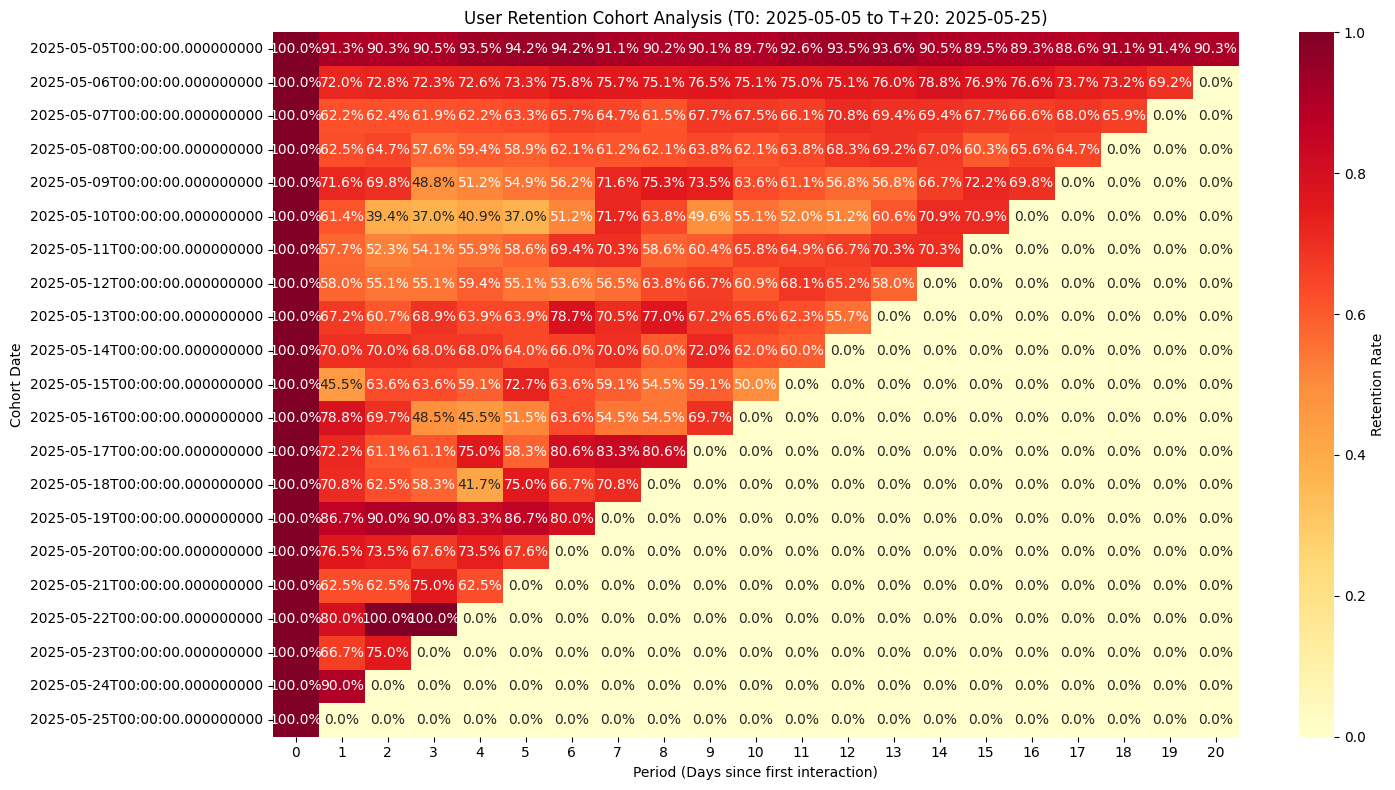

Overall Retention Summary:
Day 1 Retention: 66.83%
Day 3 Retention: 56.11%
Day 7 Retention: 31.71%
Day 14 Retention: 28.73%
Day 20 Retention: 4.30%


In [67]:
# Create the retention heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(retention_rates, 
            annot=True, 
            fmt='.1%',
            cmap='YlOrRd',
            cbar_kws={'label': 'Retention Rate'})

plt.title('User Retention Cohort Analysis (T0: 2025-05-05 to T+20: 2025-05-25)')
plt.xlabel('Period (Days since first interaction)')
plt.ylabel('Cohort Date')
plt.tight_layout()
plt.show()

# Print summary statistics
print("Overall Retention Summary:")
print(f"Day 1 Retention: {retention_rates[1].mean():.2%}")
print(f"Day 3 Retention: {retention_rates[3].mean():.2%}")
print(f"Day 7 Retention: {retention_rates[11].mean():.2%}")
print(f"Day 14 Retention: {retention_rates[12].mean():.2%}")
print(f"Day 20 Retention: {retention_rates[20].mean():.2%}")


Comment

## 4.2 Retention by Content Categories

In [68]:
# Create summary table showing retention by day and category
def retention_summary_by_category(df):
    categories = df['streamer_live_operation_tag'].unique()
    summary_data = []
    
    for category in categories:
        cat_data = df[df['streamer_live_operation_tag'] == category]
        cohort_counts = create_cohort_table(cat_data)
        retention_rates = calculate_retention_rates(cohort_counts)
        
        summary_data.append({
            'Category': category,
            'Day_0': '100.0%',
            'Day_1': f"{retention_rates[13].mean():.1%}" if 1 in retention_rates.columns else "N/A",
            'Day_7': f"{retention_rates[11].mean():.1%}" if 7 in retention_rates.columns else "N/A",
            'Day_14': f"{retention_rates[12].mean():.1%}" if 14 in retention_rates.columns else "N/A",
            'Day_20': f"{retention_rates[14].mean():.1%}" if 20 in retention_rates.columns else "N/A"
        })
    
    return pd.DataFrame(summary_data)

summary_df = retention_summary_by_category(retention_data)
print(summary_df)


        Category   Day_0  Day_1  Day_7 Day_14 Day_20
0           Chat  100.0%  35.6%  44.5%  39.2%  34.5%
1          Other  100.0%  24.9%  30.4%  29.5%  21.4%
2         Talent  100.0%  39.7%  47.0%  43.3%  35.0%
3          Group  100.0%  42.0%  49.3%  44.6%  37.9%
4         Beauty  100.0%  40.7%  46.8%  44.5%  35.6%
5     E-Commerce  100.0%  44.1%  51.8%  46.8%  40.0%
6           Game  100.0%  44.3%  54.3%  50.5%  43.6%
7      Lifestyle  100.0%  54.7%  69.7%  60.1%  53.3%
8        Hobbies  100.0%  47.7%  53.1%  51.8%  42.0%
9      Education  100.0%  39.6%  45.3%  48.7%  44.4%
10  Relationship  100.0%  46.7%  47.6%  51.1%  46.6%
11       Fitness  100.0%   inf%   inf%   inf%   inf%
12          News  100.0%   inf%   inf%   inf%   inf%


# 5. Summary

In [69]:
user.head()

,user_id,age,gender,country,device_brand,device_price,reg_timestamp,fans_num,follow_num,first_watch_live_timestamp,accu_watch_live_cnt,accu_watch_live_duration,is_live_streamer,is_photo_author,onehot_feat0,onehot_feat1,onehot_feat2,onehot_feat3,onehot_feat4,onehot_feat5,onehot_feat6,tenure,active_time
0,22733,18-23,M,China,DESKTOP,0,2023-05-03,0-10,10-100,2023-05-03,0-50000,0-1000000000,0,0,0,0,0,0,0,0,0,754,754
1,3085,50+,M,China,HONOR,2000-4000,2023-07-11,10-100,100-1000,2023-07-12,0-50000,1000000000-5000000000,0,1,1,1,0,0,0,0,0,685,684
2,10604,41-49,M,China,HUAWEI,2000-4000,2017-02-14,100-1000,10-100,2017-10-04,0-50000,1000000000-5000000000,1,1,1,0,0,0,0,0,0,3023,2791
3,7056,31-40,M,China,OPPO,1000-2000,2017-09-06,10-100,10-100,2017-09-06,0-50000,0-1000000000,0,1,1,0,0,1,0,0,0,2819,2819
4,3791,41-49,M,China,HONOR,1000-2000,2019-05-21,1000-10000,1000-10000,2019-05-21,100000-500000,10000000000-50000000000,1,1,0,0,0,0,0,0,0,2197,2197


In [70]:
streamer.head()

,streamer_id,gender,age,country,device_brand,device_price,live_operation_tag,fans_user_num,fans_group_fans_num,follow_user_num,first_live_timestamp,accu_live_cnt,accu_live_duration,accu_play_cnt,accu_play_duration,reg_timestamp,onehot_feat0,onehot_feat1,onehot_feat2,onehot_feat3,onehot_feat4,onehot_feat5,onehot_feat6,tenure,active_time
0,56006,M,24-30,China,APPLE,5000+,Relationship,10000-100000,0-10,1000-10000,2018-02-04,100-500,500000000-1000000000,100000-500000,50000000000-100000000000,2014-07-03,1,0,0,0,0,0,0,3980,2668
1,354478,M,24-30,China,APPLE,5000+,Chat,100-1000,10-50,10-100,2016-07-31,100-500,1000000000-3000000000,0-50000,0-1000000000,2014-09-11,1,0,0,0,0,0,0,3910,3221
2,357970,M,24-30,China,APPLE,5000+,Other,100-1000,0-10,100-1000,2024-12-26,0-50,0-100000000,0-50000,0-1000000000,2014-09-17,1,0,0,0,0,0,0,3904,151
3,108285,F,18-23,China,APPLE,5000+,Beauty,10000-100000,500-1000,100-1000,2018-02-19,5000-10000,10000000000-50000000000,1000000-5000000,100000000000-500000000000,2014-09-28,1,1,0,0,0,0,0,3893,2653
4,36951,M,31-40,China,APPLE,5000+,Chat,100000-1000000,5000-10000,1000-10000,2016-10-21,1000-5000,10000000000-50000000000,10000000+,1000000000000-5000000000000,2014-10-12,0,0,0,0,0,0,0,3879,3139
